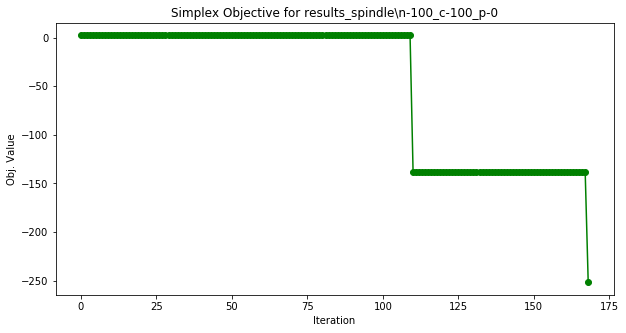

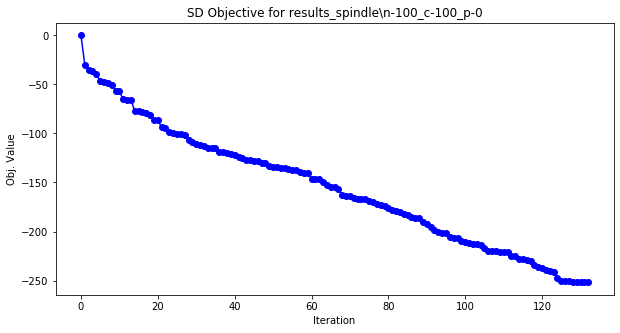

C:\Users\Chase\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


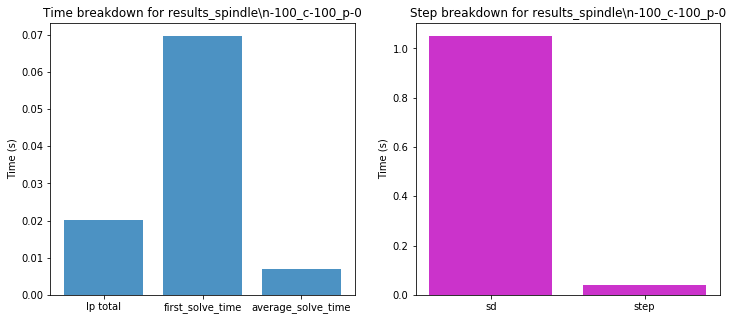

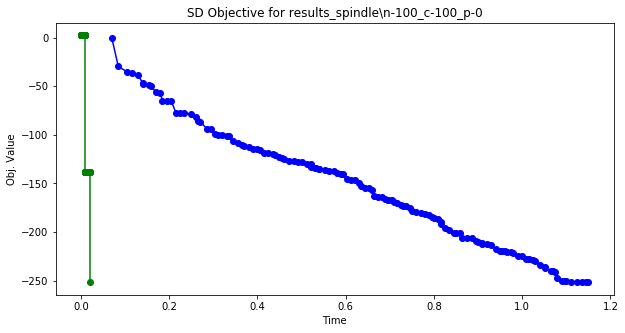

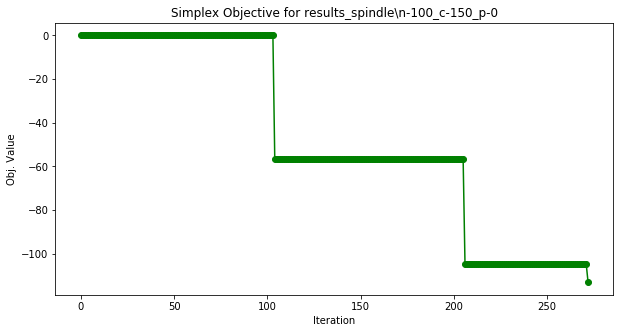

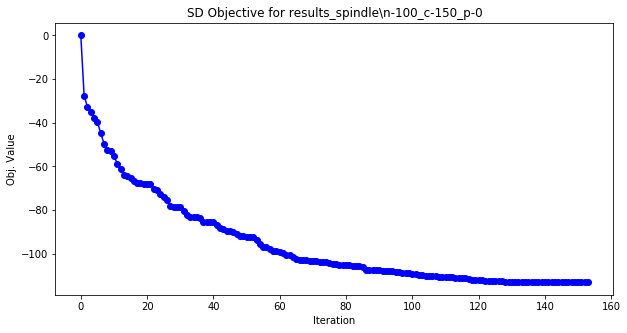

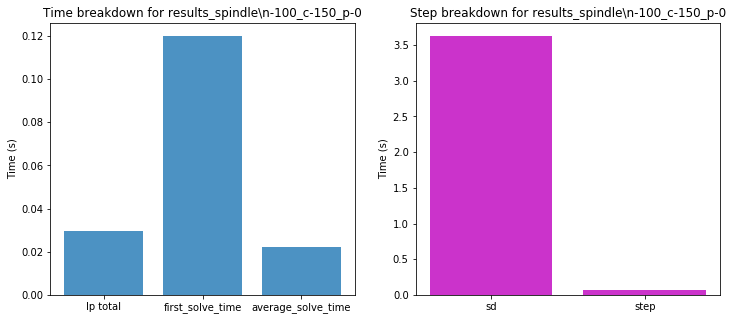

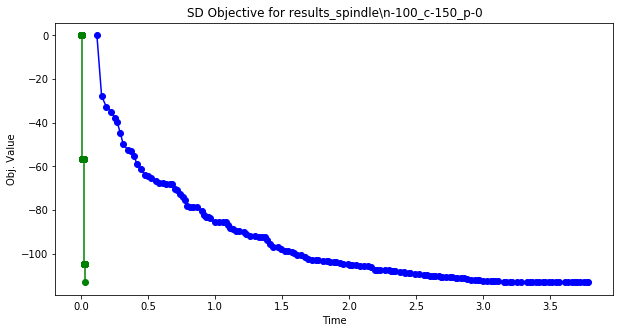

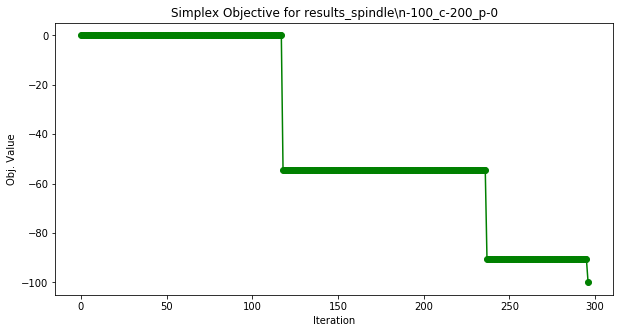

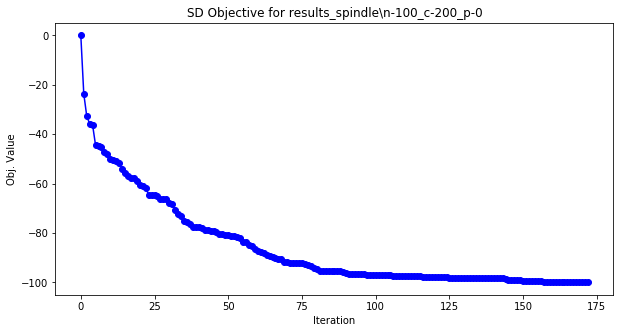

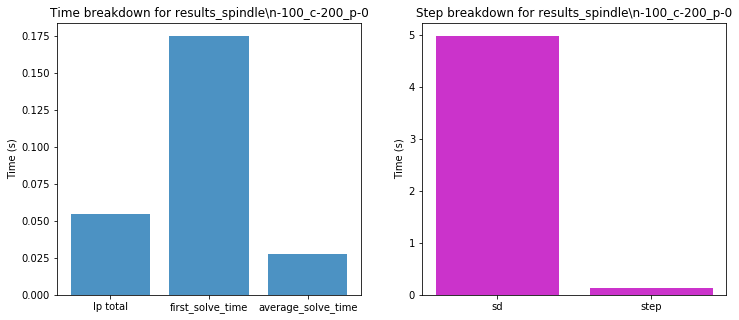

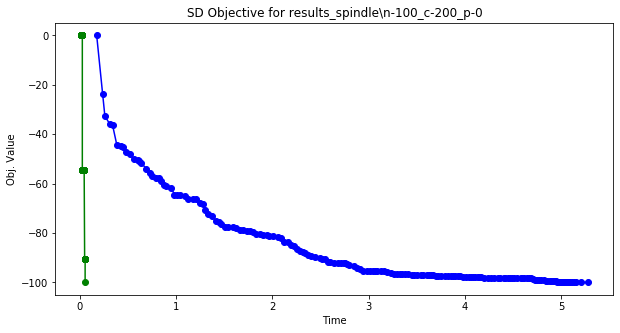

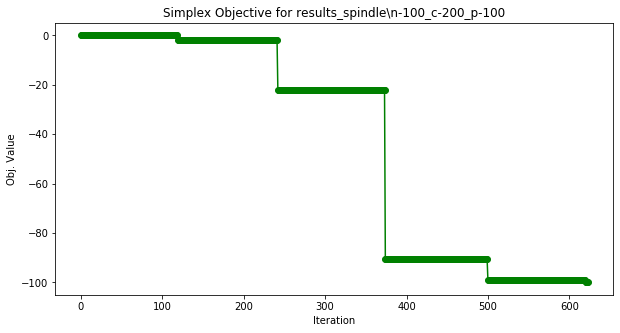

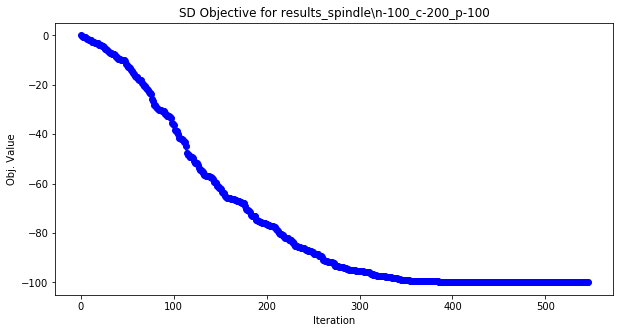

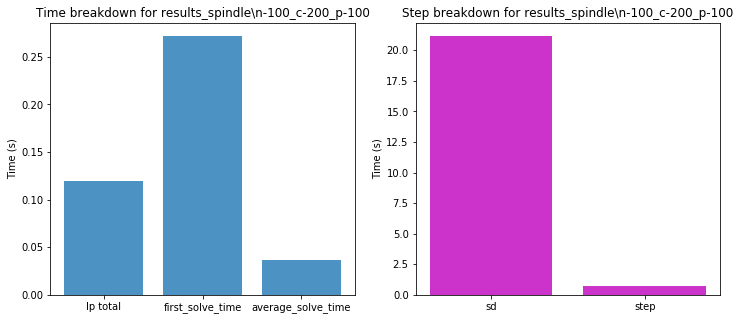

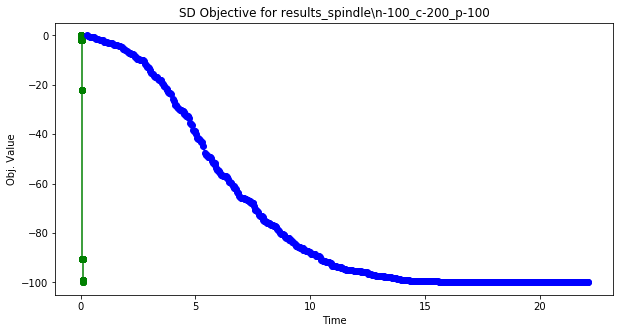

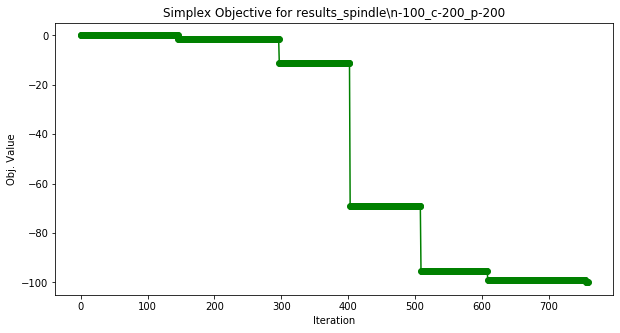

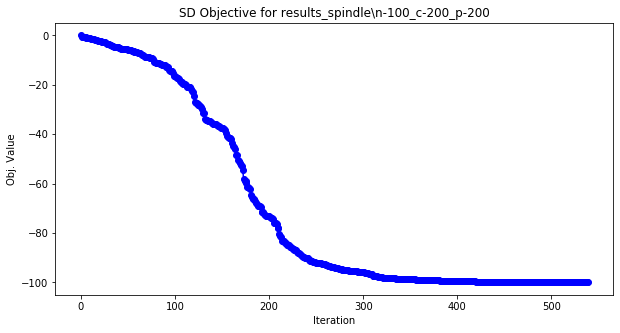

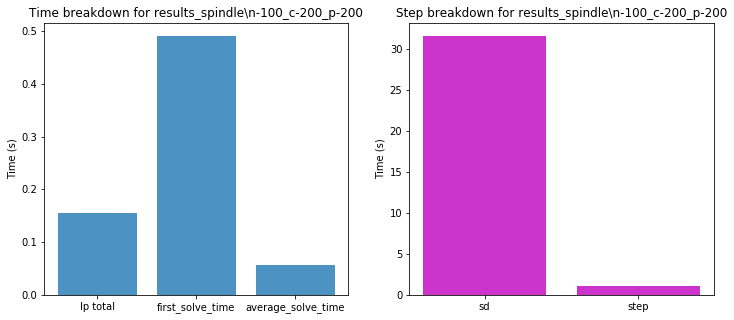

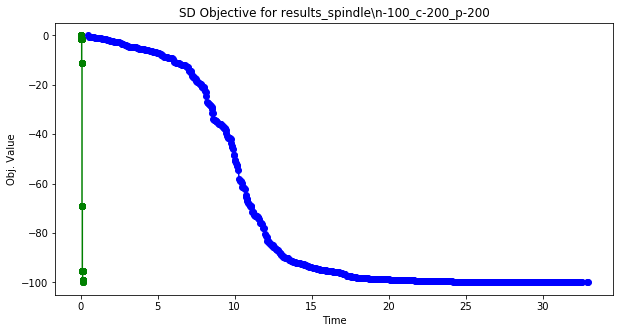

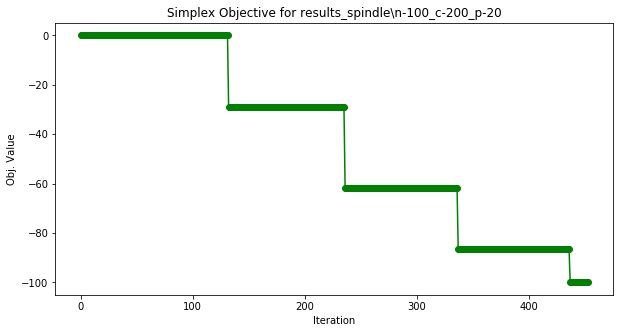

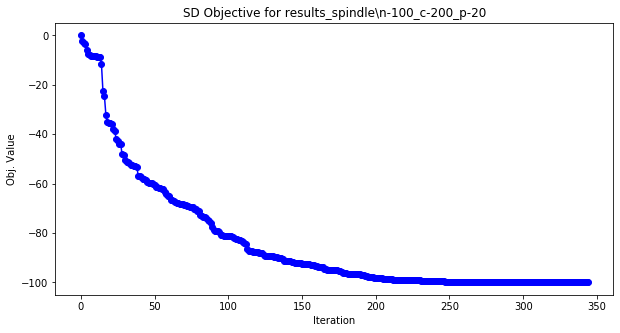

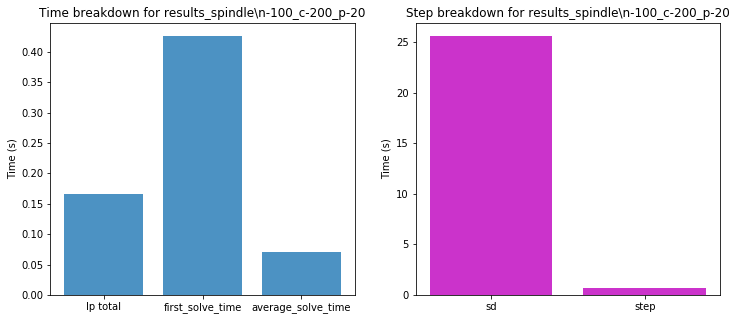

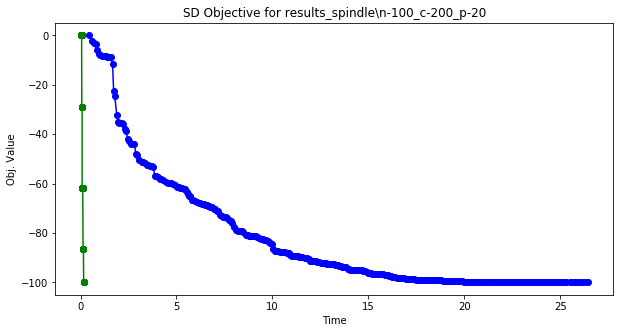

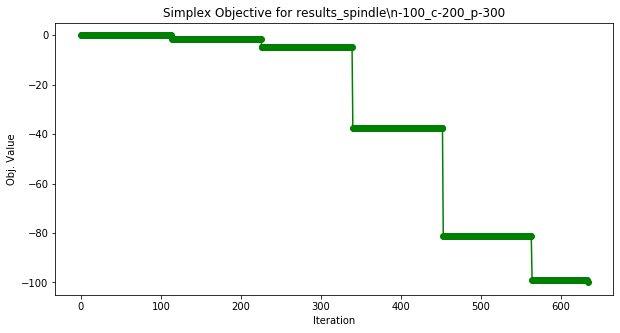

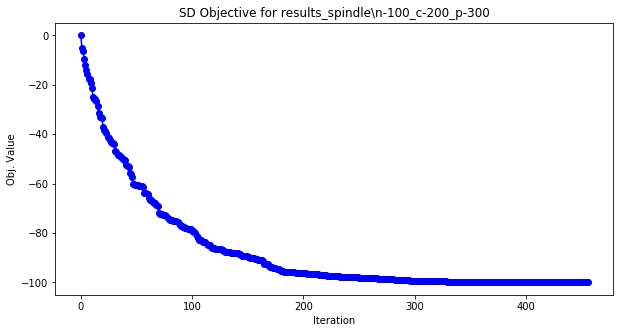

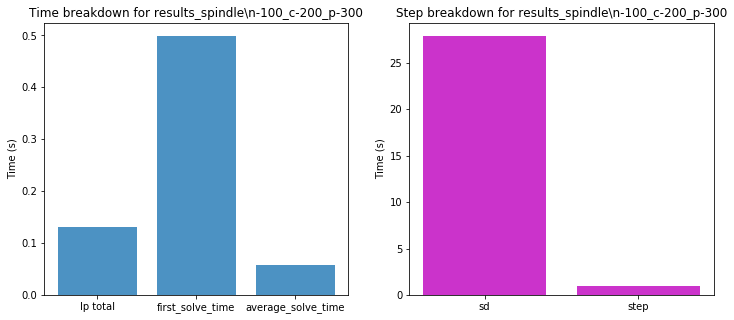

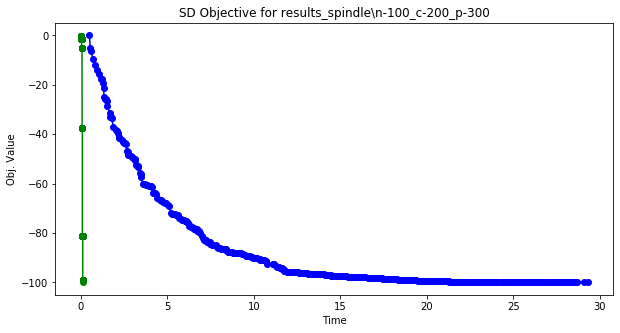

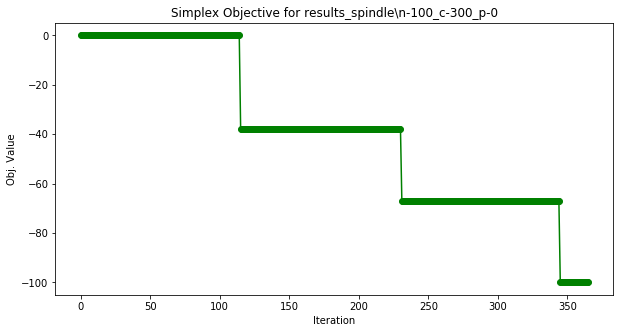

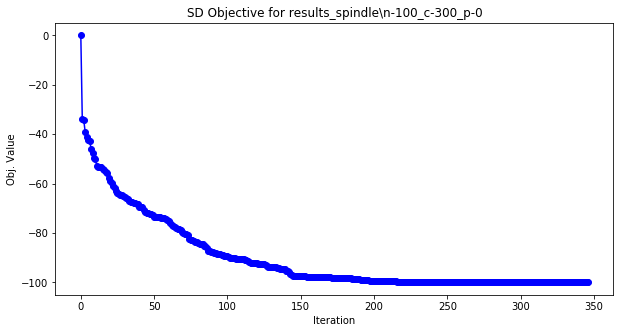

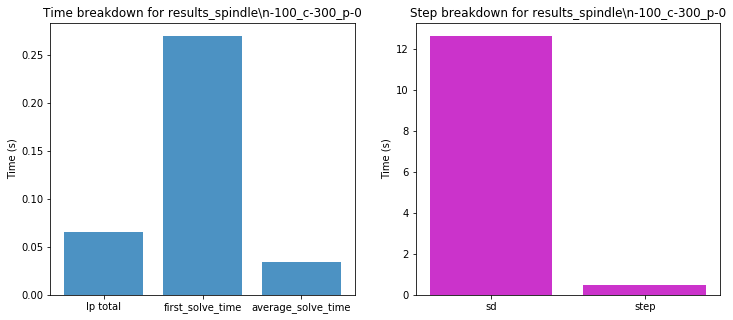

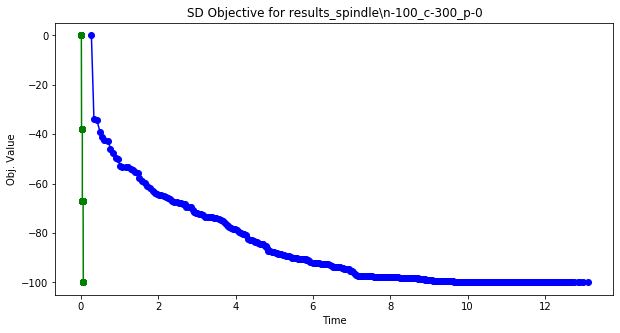

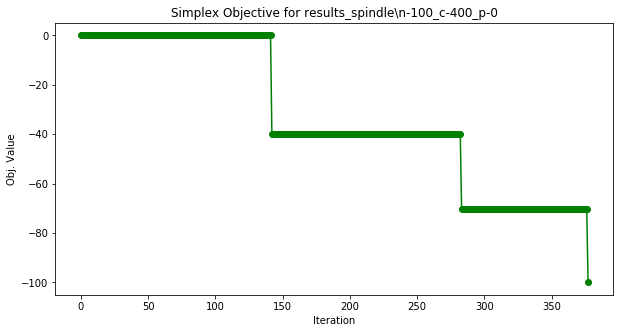

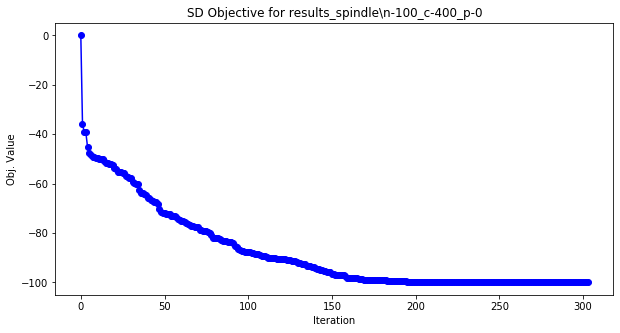

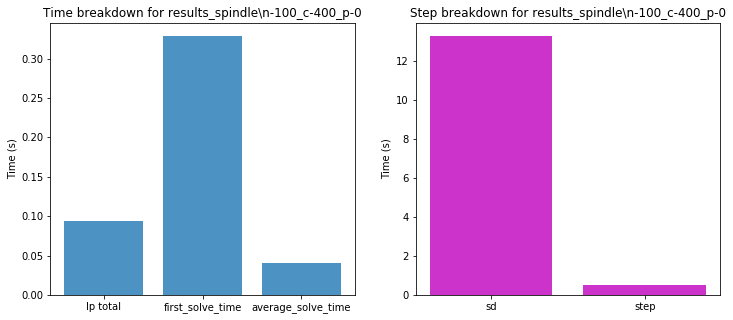

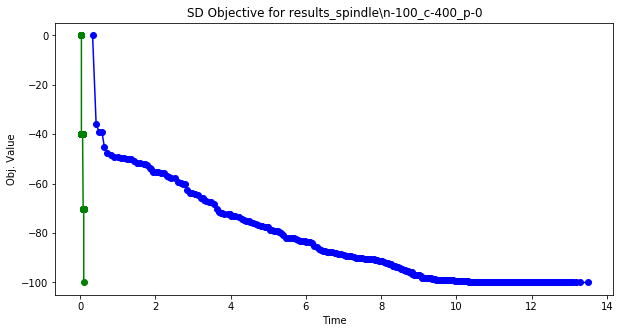

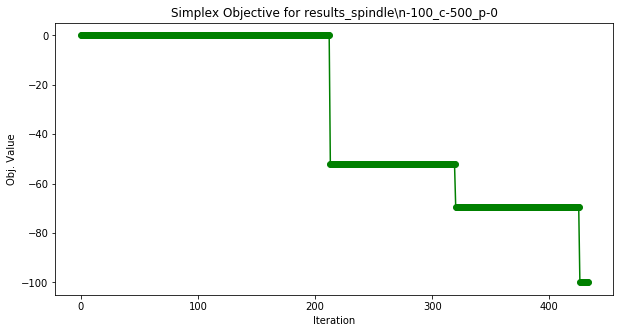

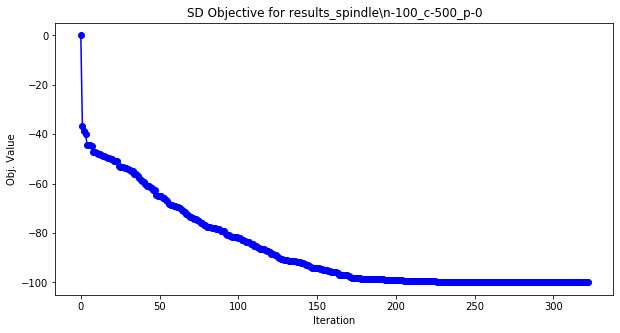

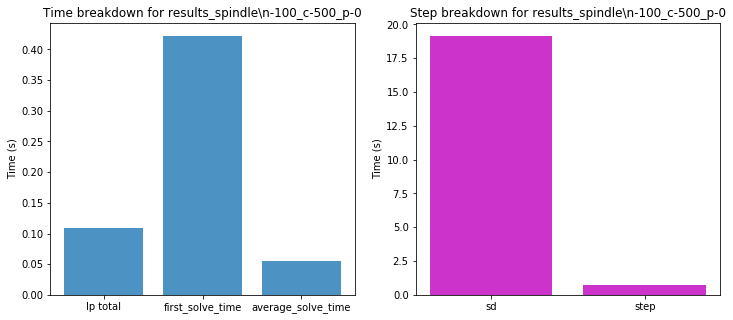

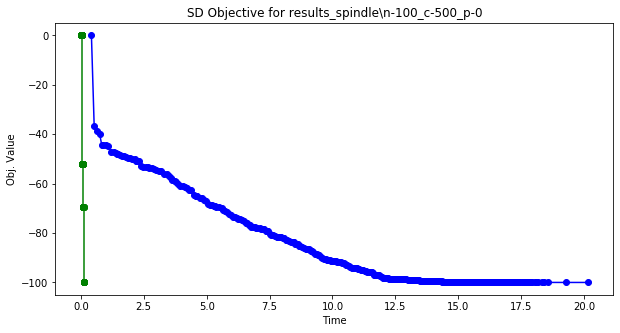

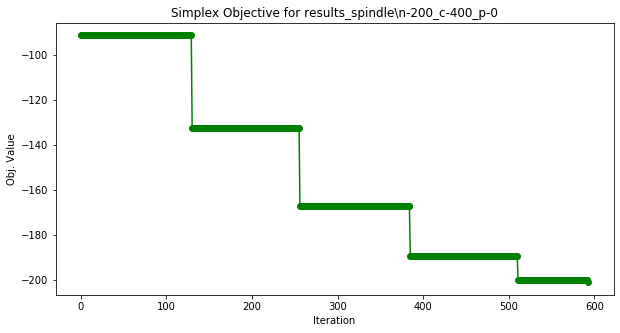

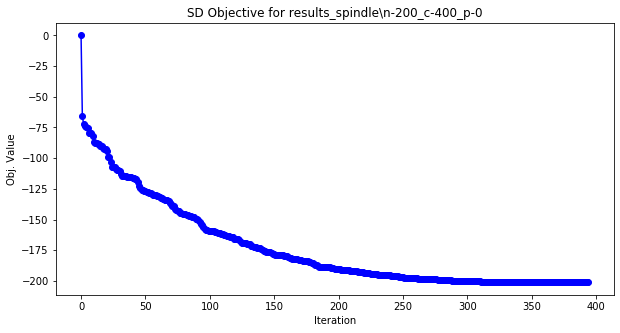

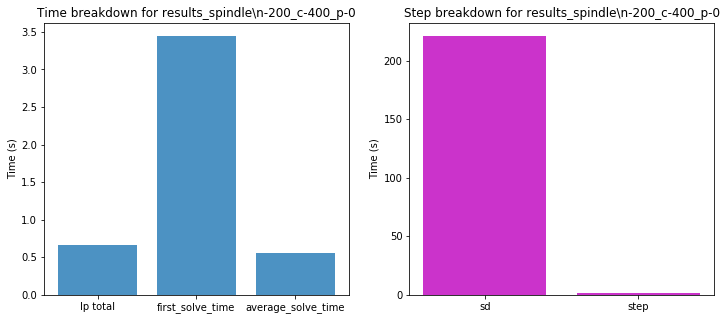

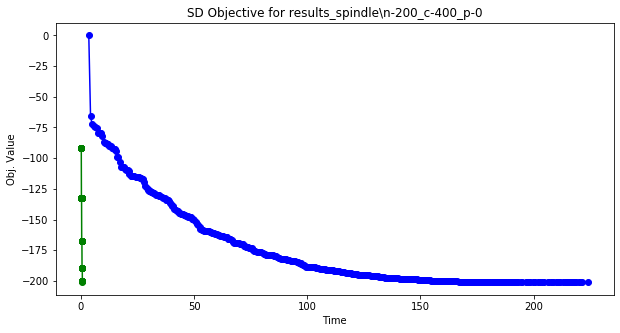

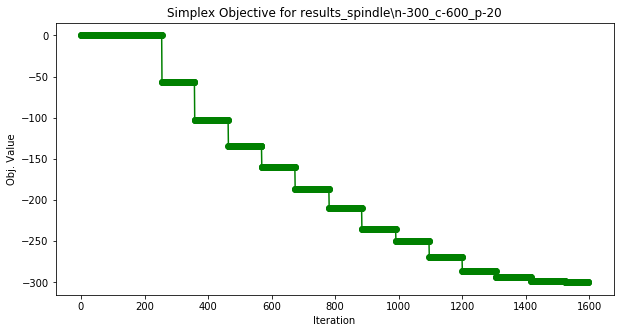

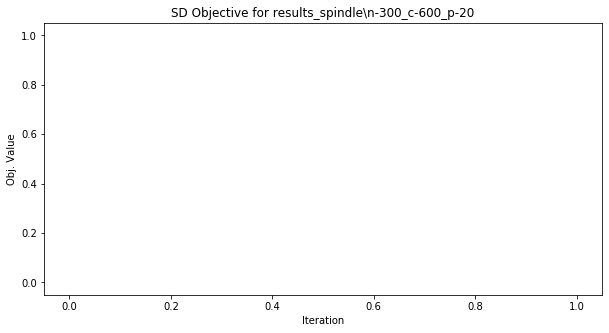

KeyError: 'solve_times'

In [2]:
import os
import pickle
from glob import glob
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

from utils import avg

results_dir = 'results_spindle'
lp_results_fns = glob(os.path.join(results_dir, '*_lp.p'))
sd_results_fns = [f.replace('lp.p', 'sd.p') for f in lp_results_fns]

for (lp_fn, sd_fn) in zip(lp_results_fns, sd_results_fns):
    problem_name = lp_fn.replace('_lp.p', '')    
    with open(lp_fn, 'rb') as f:
        lp_results = pickle.load(f)
    with open(sd_fn, 'rb') as f:
        sd_results = pickle.load(f)
        
    lp_results['obj_values'].append(lp_results['obj'])  
    lp_results['iter_times'].append(lp_results['solve_time_total'])  
    plt.figure(figsize=(10,5))
    plt.title('Simplex Objective for {}'.format(problem_name))
    plt.xlabel('Iteration')
    plt.ylabel('Obj. Value')
    plt.plot(list(range(len(lp_results['obj_values']))), lp_results['obj_values'], 'go-')
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.title('SD Objective for {}'.format(problem_name))
    plt.xlabel('Iteration')
    plt.ylabel('Obj. Value')
    plt.plot(list(range(len(sd_results['obj_values']))), sd_results['obj_values'], 'bo-')
    plt.show()
    
    times = {}
    #times['sd total'] = sd_results['solve_time_total']
    times['lp total'] = lp_results['solve_time_total']
    times['first_solve_time'] = sd_results['solve_times'][0]
    times['average_solve_time'] = avg(sd_results['solve_times'][1:])
    
    subtimes = {}
    subtimes['sd'] = sum(sd_results['sub_times']['sd'][1:])
    #subtimes['active_inds'] = sum(sd_results['sub_times']['active_inds'][1:])
    #subtimes['alpha'] = sum(sd_results['sub_times']['alpha'][1:])
    subtimes['step'] = sum(sd_results['sub_times']['step'][1:])
    #subtimes['solve'] = sum(sd_results['sub_times']['solve'][1:])
       
    time_types = [key for key in times]
    subtime_types = [key for key in subtimes]

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    ax1.set_title('Time breakdown for {}'.format(problem_name))
    ax1.set_ylabel('Time (s)')
    x_pos = np.arange(len(time_types))
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(time_types)
    values = [times[key] for key in times]
    ax1.bar(x_pos, values, align='center', alpha=0.8)

    ax2.set_title('Step breakdown for {}'.format(problem_name))
    ax2.set_ylabel('Time (s)')
    x_pos = np.arange(len(subtime_types))
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(subtime_types)
    values = [subtimes[key] for key in subtimes]
    ax2.bar(x_pos, values, align='center', alpha=0.8, color='m')
    f.show() 
    
    plt.figure(figsize=(10,5))
    plt.title('SD Objective for {}'.format(problem_name))
    plt.xlabel('Time')
    plt.ylabel('Obj. Value')
    plt.plot(lp_results['iter_times'], lp_results['obj_values'], 'go-')
    plt.plot(sd_results['iter_times'], sd_results['obj_values'], 'bo-')
    plt.show()


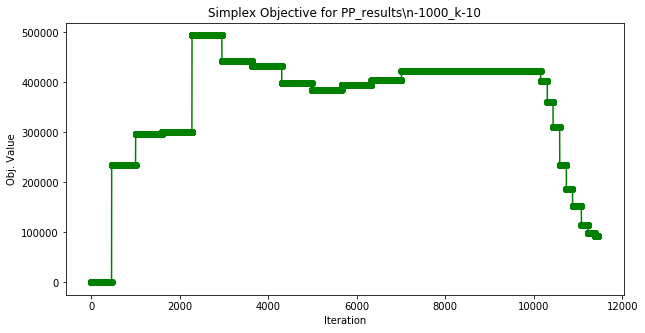

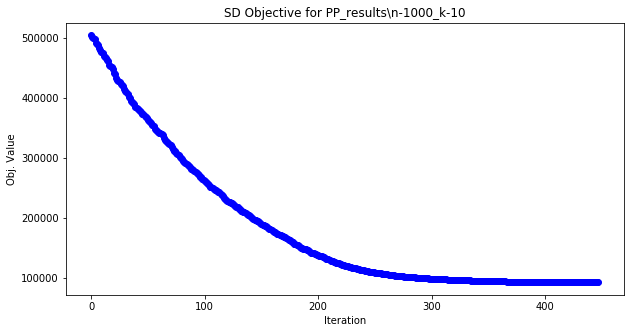

C:\Users\Chase\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


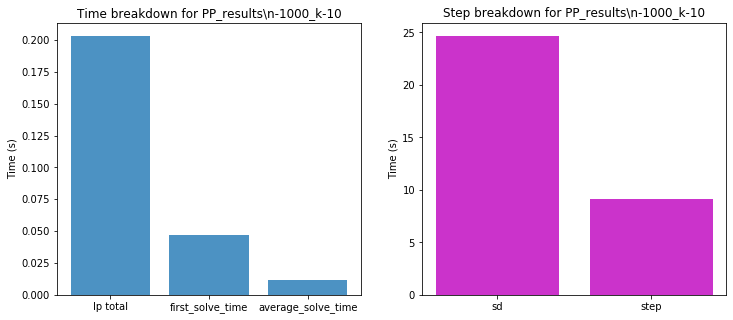

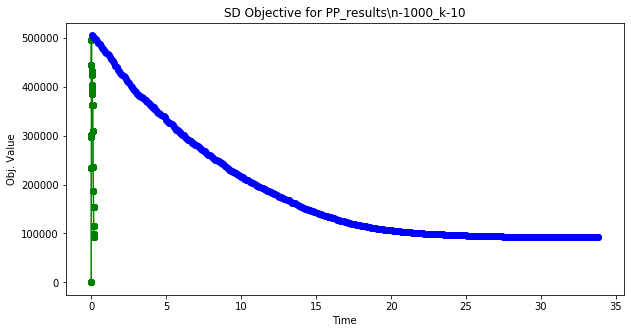

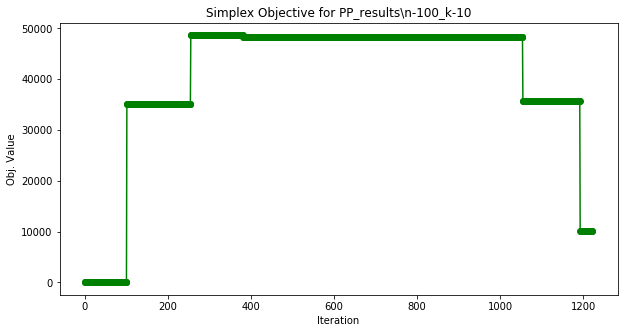

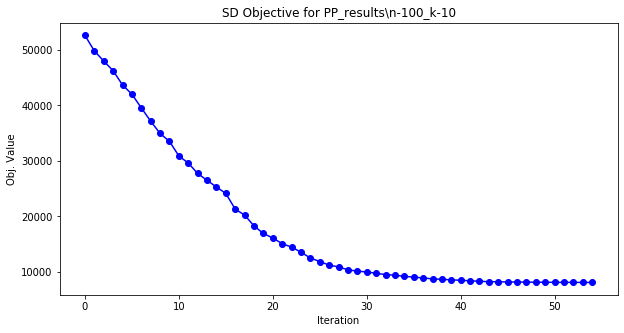

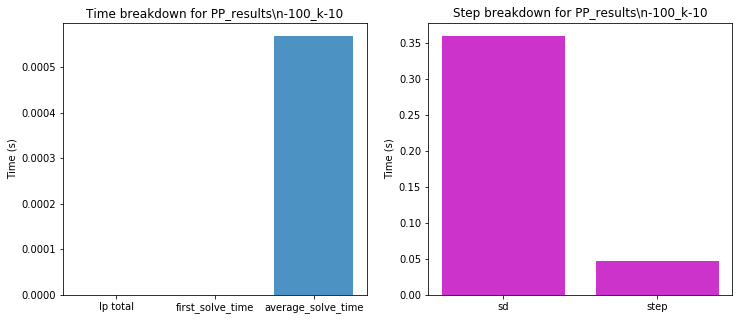

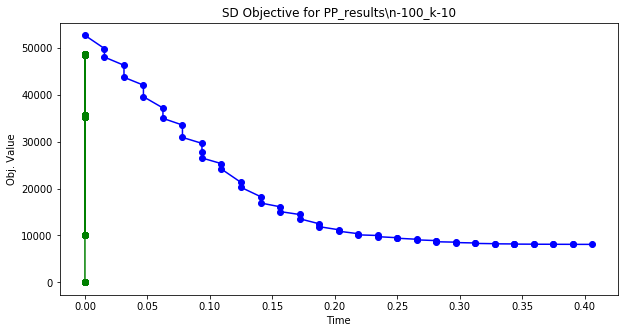

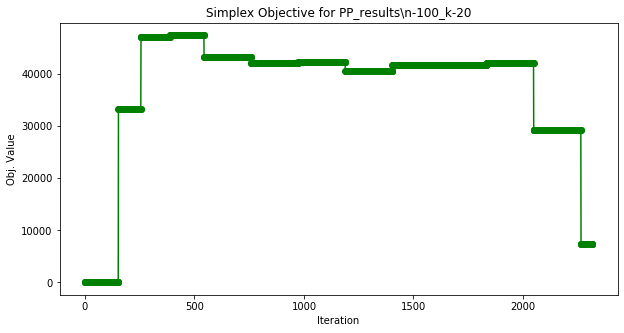

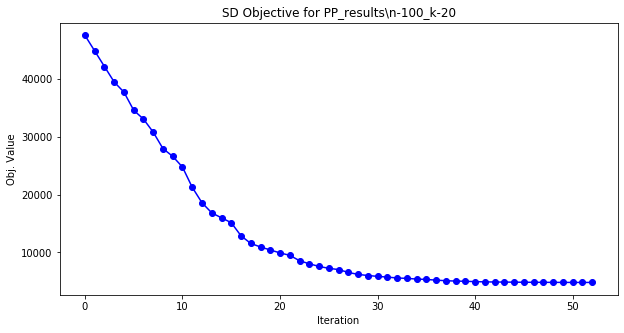

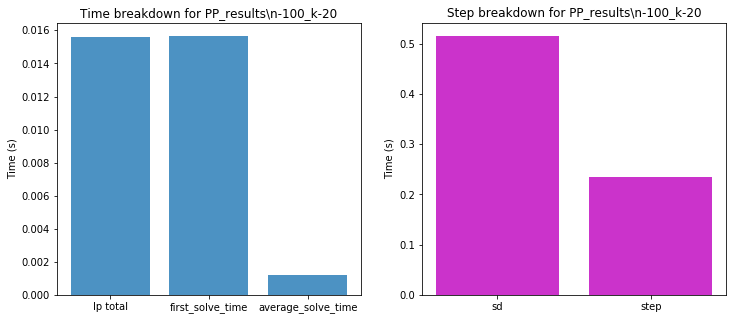

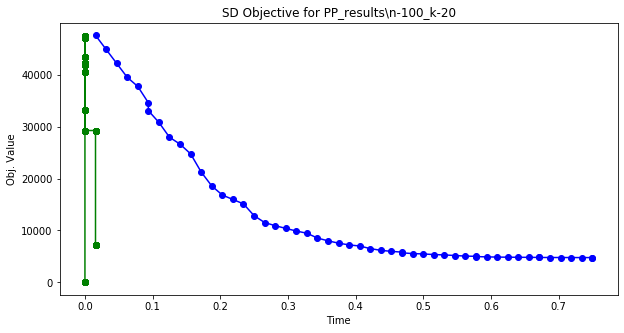

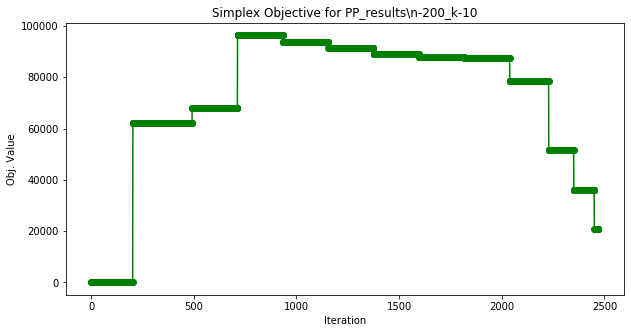

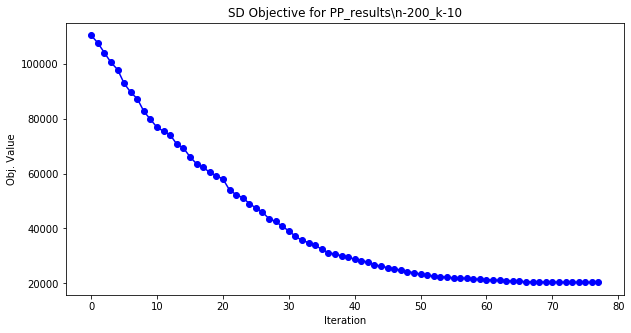

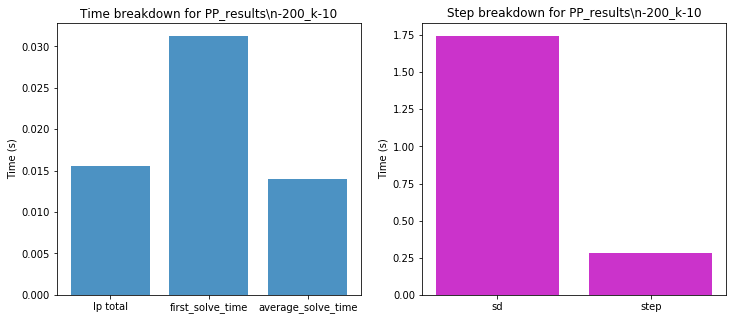

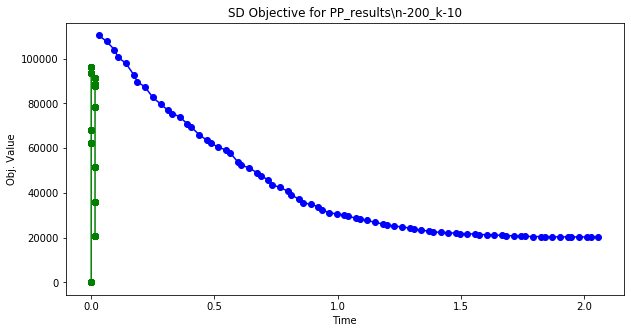

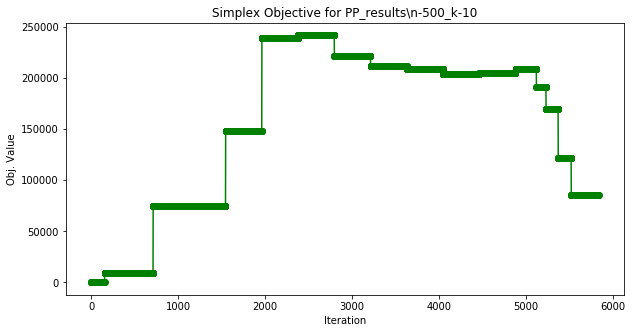

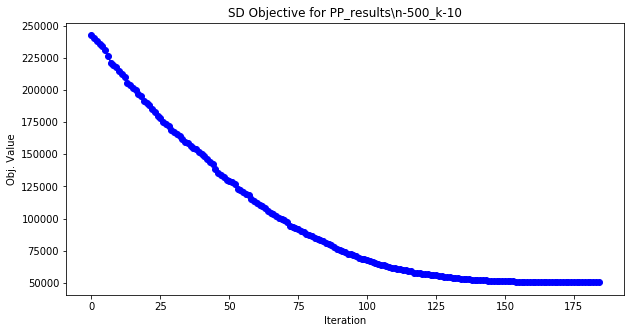

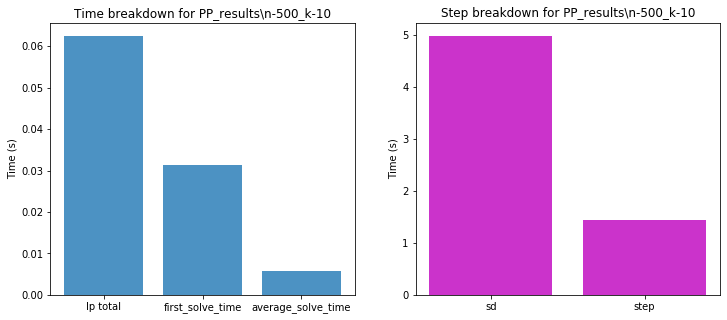

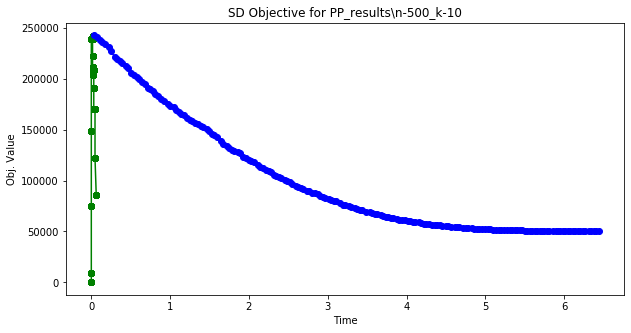

In [27]:
import os
import pickle
from glob import glob
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

from utils import avg

results_dir = 'PP_results'
lp_results_fns = glob(os.path.join(results_dir, '*_lp.p'))
sd_results_fns = [f.replace('lp.p', 'sd.p') for f in lp_results_fns]

for (lp_fn, sd_fn) in zip(lp_results_fns, sd_results_fns):
    problem_name = lp_fn.replace('_lp.p', '')    
    with open(lp_fn, 'rb') as f:
        lp_results = pickle.load(f)
    with open(sd_fn, 'rb') as f:
        sd_results = pickle.load(f)
        
    #lp_results['obj_values'].append(lp_results['obj'])    
    plt.figure(figsize=(10,5))
    plt.title('Simplex Objective for {}'.format(problem_name))
    plt.xlabel('Iteration')
    plt.ylabel('Obj. Value')
    plt.plot(list(range(len(lp_results['obj_values']))), lp_results['obj_values'], 'go-')
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.title('SD Objective for {}'.format(problem_name))
    plt.xlabel('Iteration')
    plt.ylabel('Obj. Value')
    plt.plot(list(range(len(sd_results['obj_values']))), sd_results['obj_values'], 'bo-')
    plt.show()
    
    times = {}
    #times['sd total'] = sd_results['solve_time_total']
    times['lp total'] = lp_results['solve_time_total']
    times['first_solve_time'] = sd_results['solve_times'][0]
    times['average_solve_time'] = avg(sd_results['solve_times'][1:])
    
    subtimes = {}
    subtimes['sd'] = sum(sd_results['sub_times']['sd'][1:])
    #subtimes['active_inds'] = sum(sd_results['sub_times']['active_inds'][1:])
    #subtimes['alpha'] = sum(sd_results['sub_times']['alpha'][1:])
    subtimes['step'] = sum(sd_results['sub_times']['step'][1:])
    #subtimes['solve'] = sum(sd_results['sub_times']['solve'][1:])
       
    time_types = [key for key in times]
    subtime_types = [key for key in subtimes]

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    ax1.set_title('Time breakdown for {}'.format(problem_name))
    ax1.set_ylabel('Time (s)')
    x_pos = np.arange(len(time_types))
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(time_types)
    values = [times[key] for key in times]
    ax1.bar(x_pos, values, align='center', alpha=0.8)

    ax2.set_title('Step breakdown for {}'.format(problem_name))
    ax2.set_ylabel('Time (s)')
    x_pos = np.arange(len(subtime_types))
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(subtime_types)
    values = [subtimes[key] for key in subtimes]
    ax2.bar(x_pos, values, align='center', alpha=0.8, color='m')
    f.show() 
    
    plt.figure(figsize=(10,5))
    plt.title('SD Objective for {}'.format(problem_name))
    plt.xlabel('Time')
    plt.ylabel('Obj. Value')
    plt.plot(lp_results['iter_times'], lp_results['obj_values'], 'go-')
    plt.plot(sd_results['iter_times'], sd_results['obj_values'], 'bo-')
    plt.show()


In [12]:
import os
import pickle
from glob import glob
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

from utils import avg

results_dir = 'results4'
lp_results_fns = glob(os.path.join(results_dir, '*_lp.p'))
sd_results_fns = [f.replace('lp.p', 'sd.p') for f in lp_results_fns]


scsd8


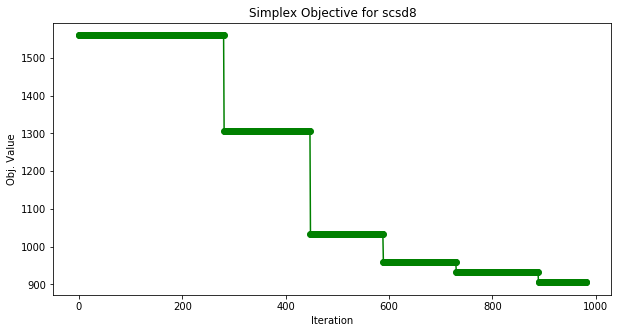

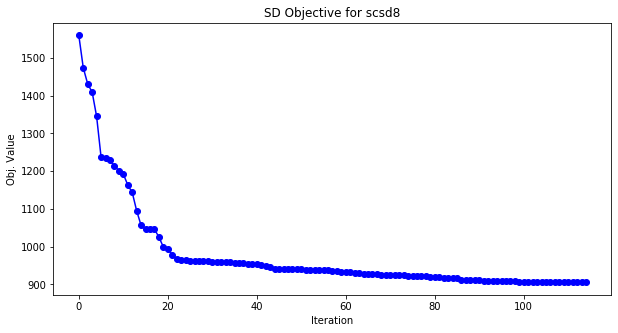

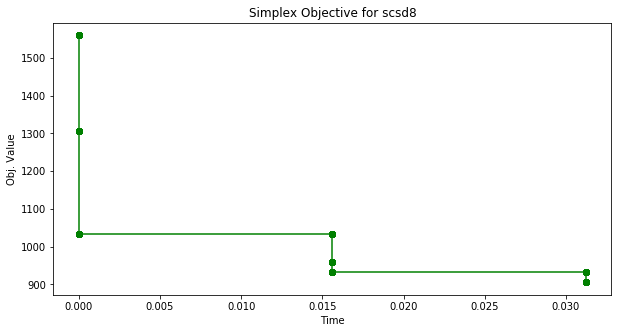

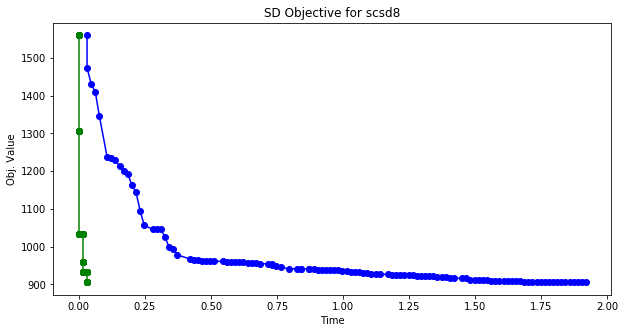






scagr25


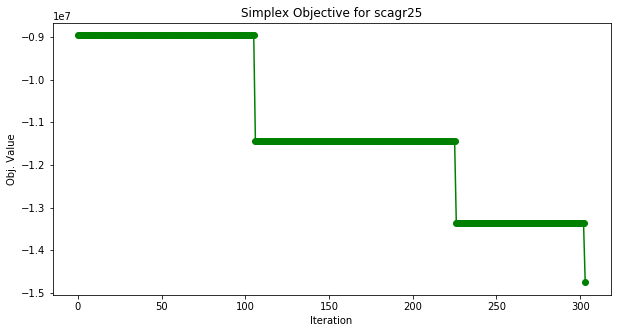

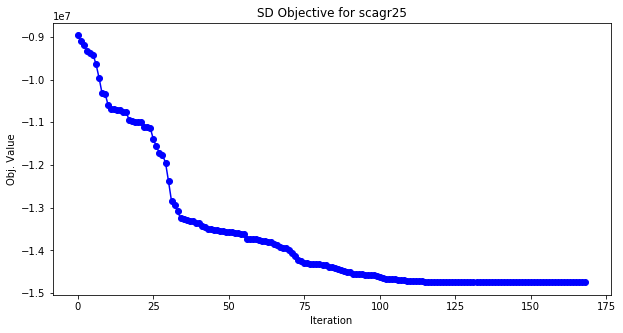

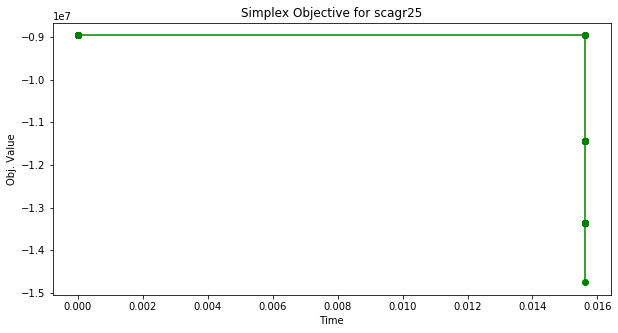

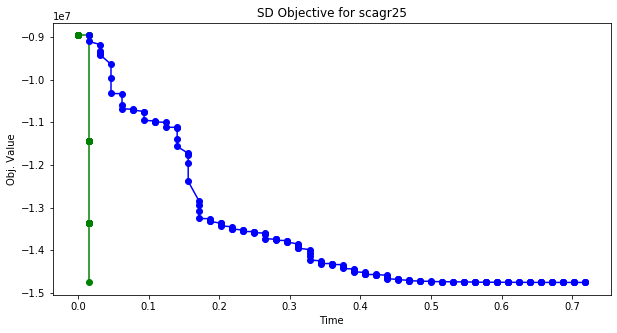






ship12s


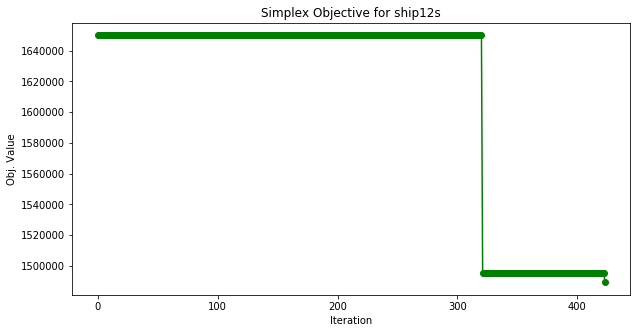

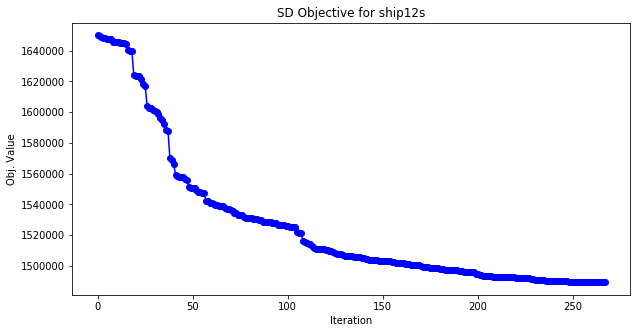

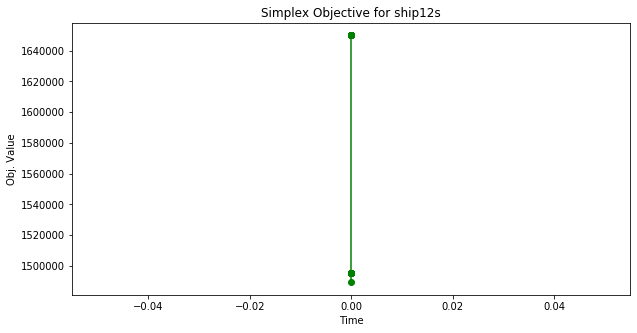

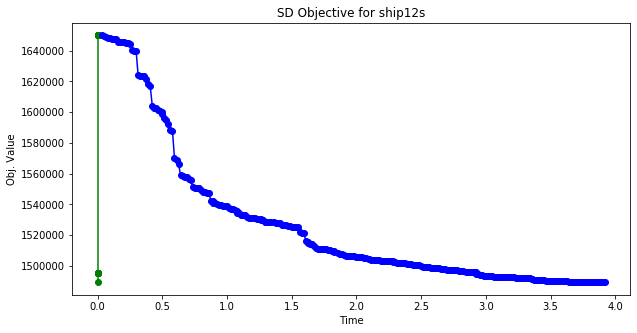






israel


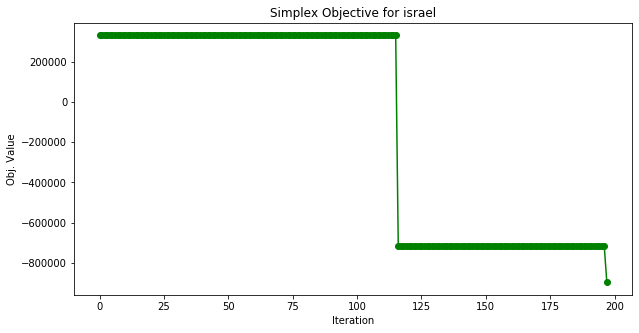

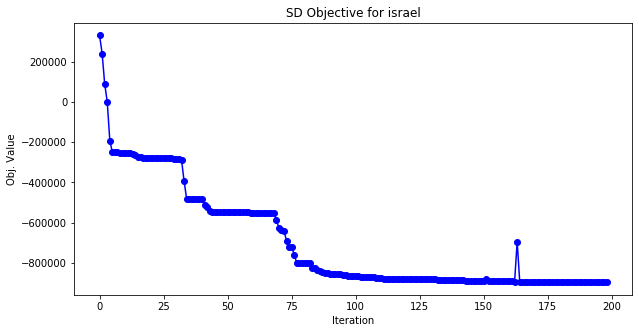

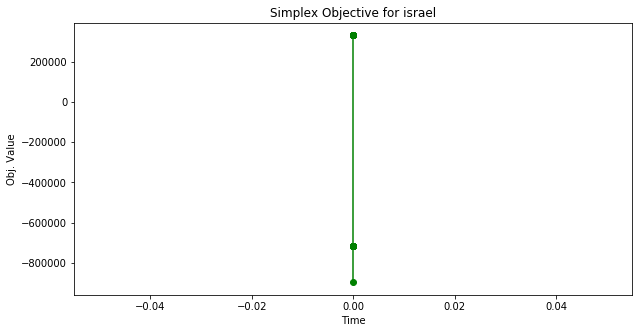

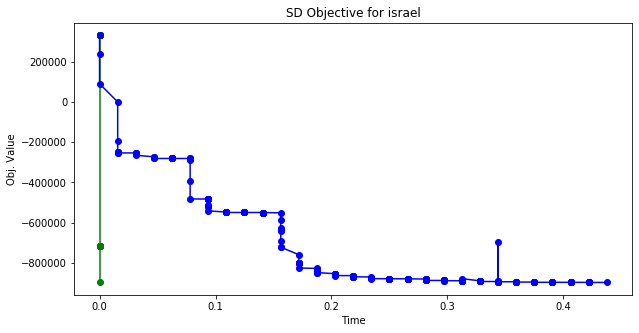






finnis


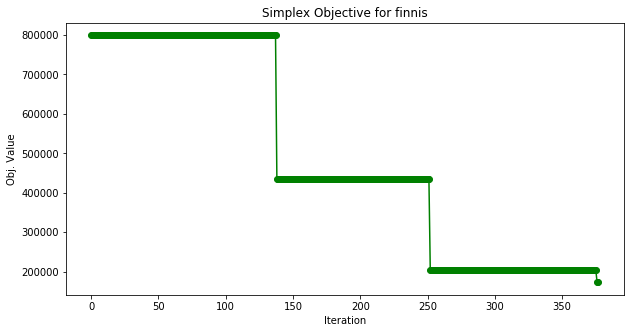

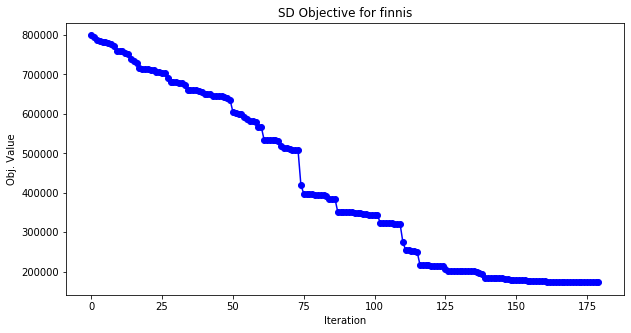

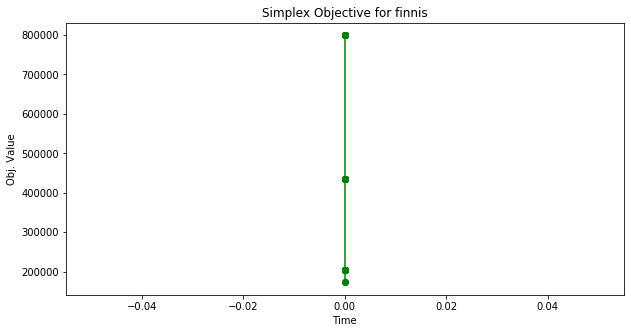

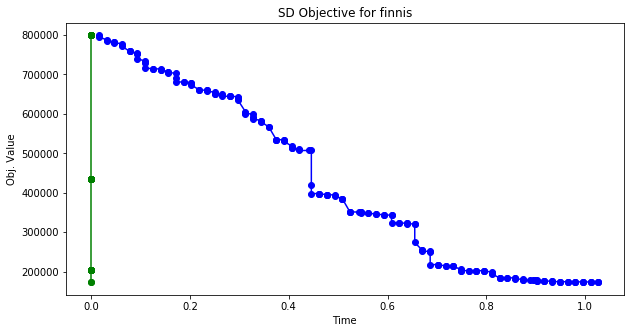






seba


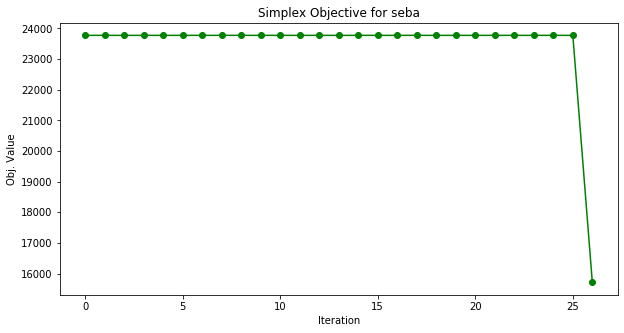

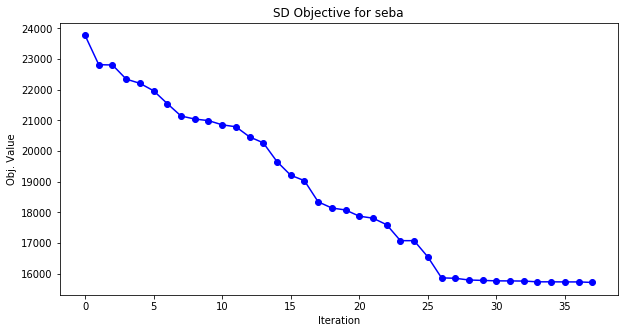

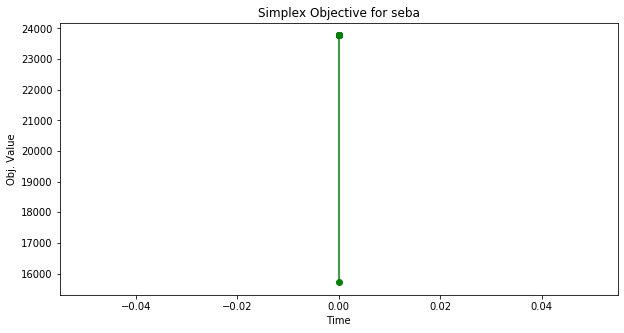

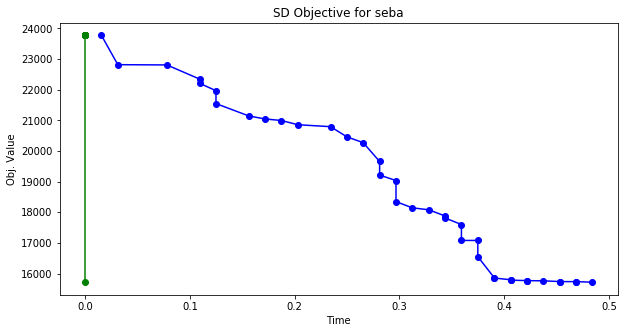






tuff


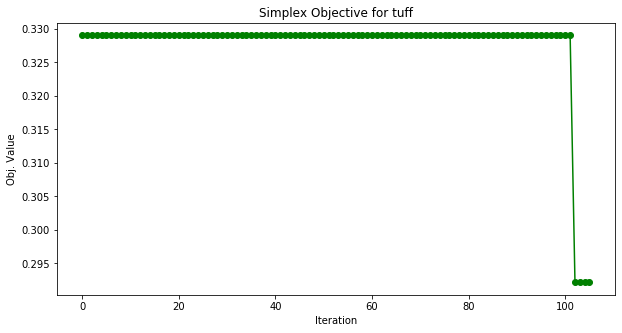

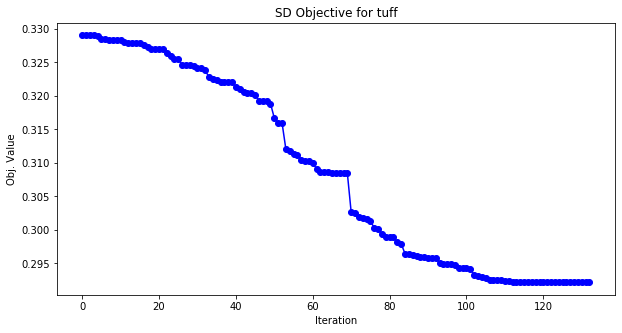

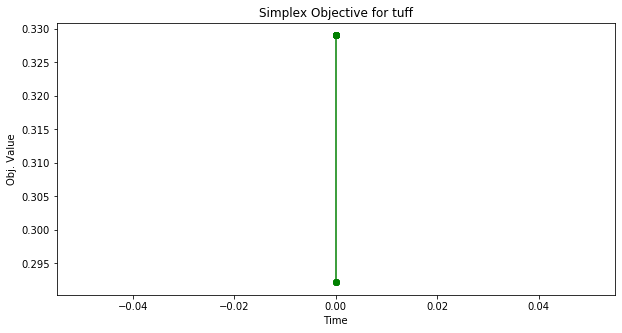

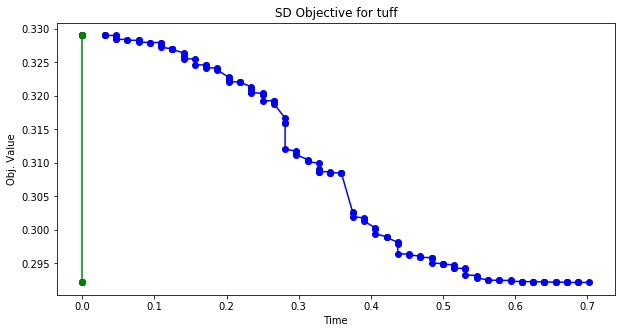






ship08s


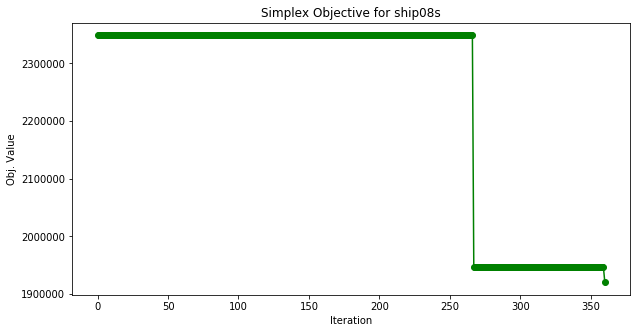

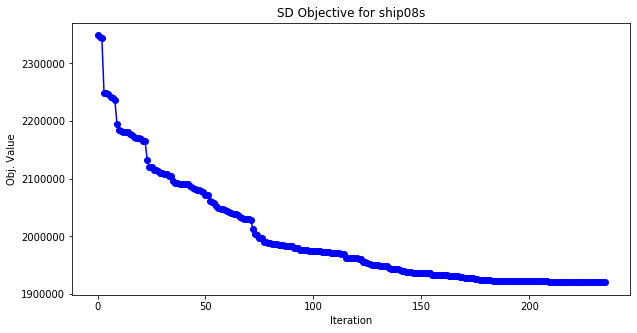

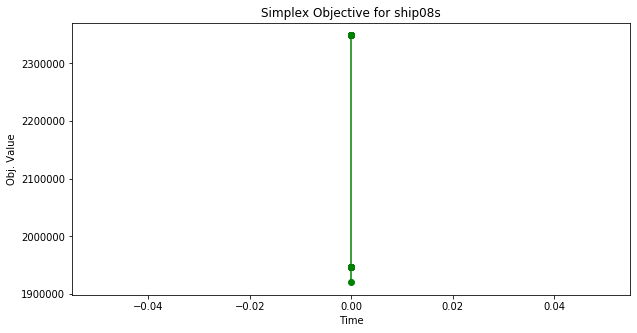

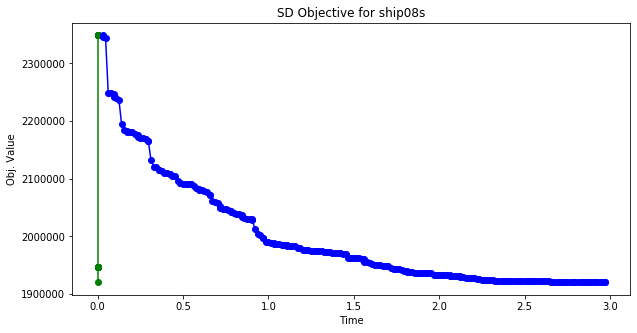






sctap1


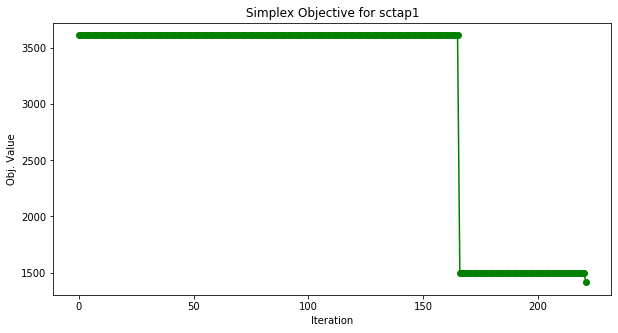

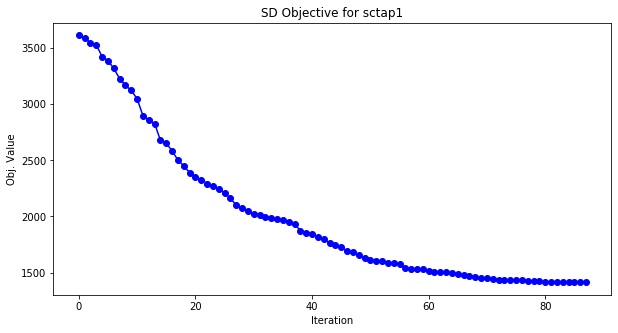

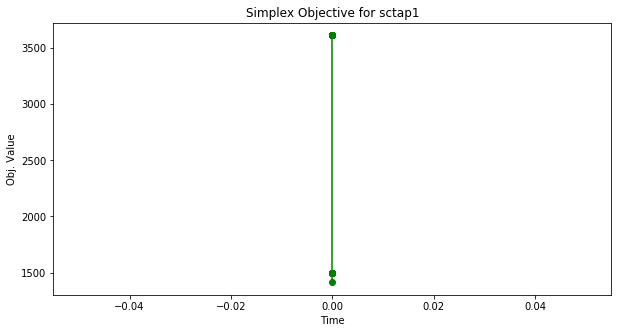

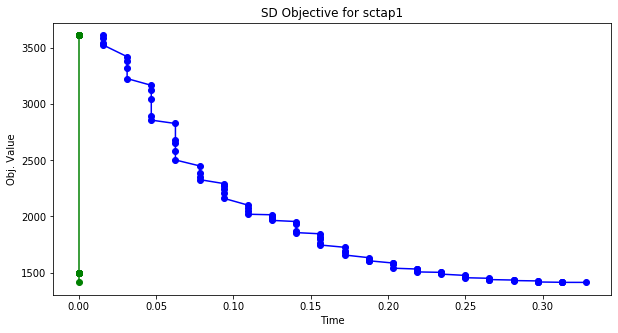






qap08


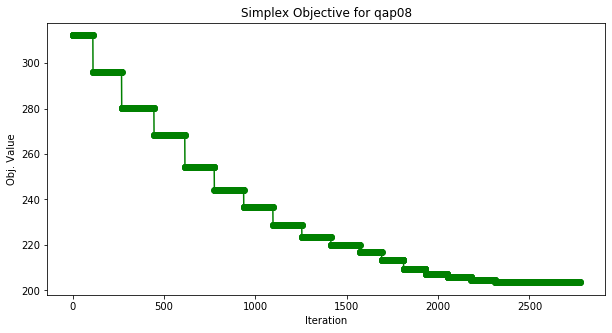

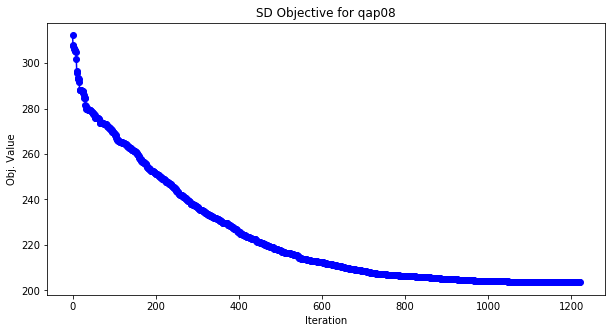

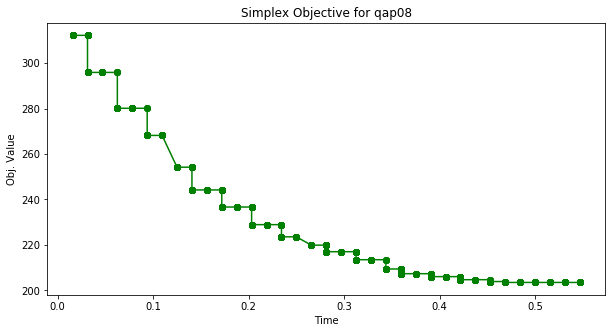

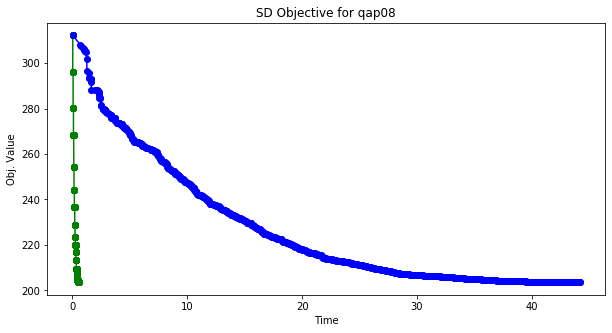






e226


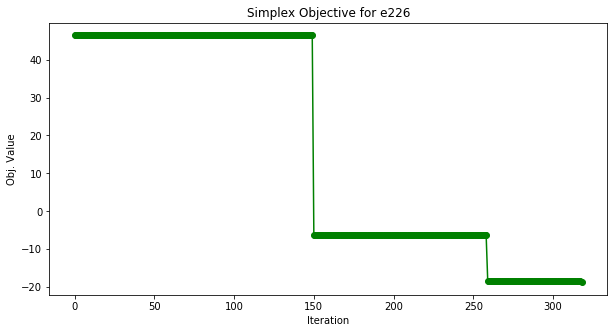

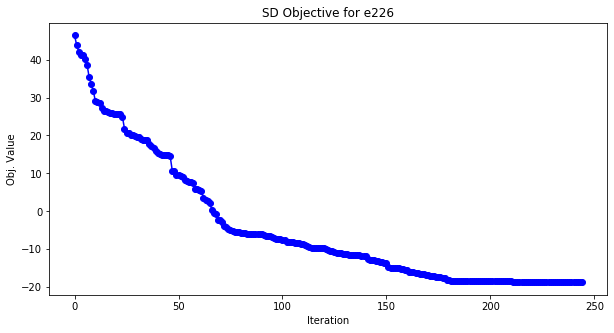

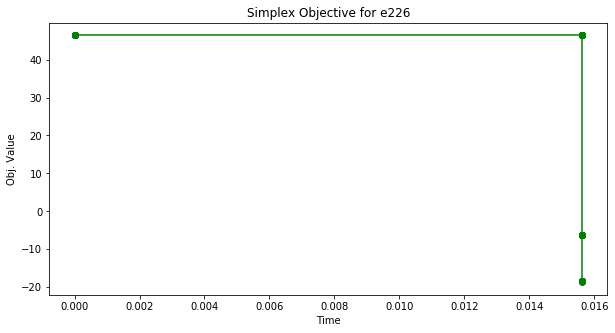

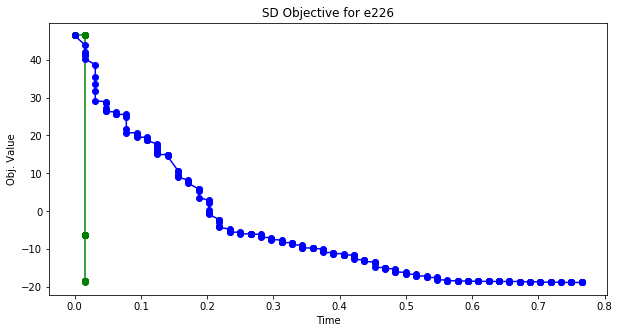






shell


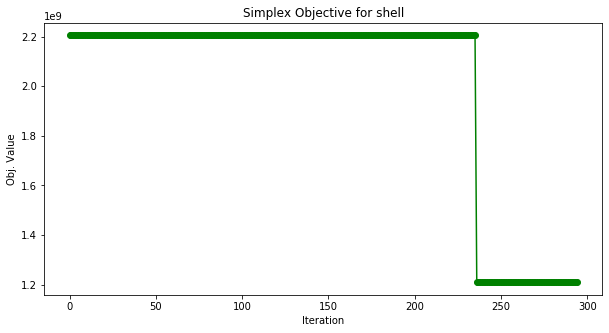

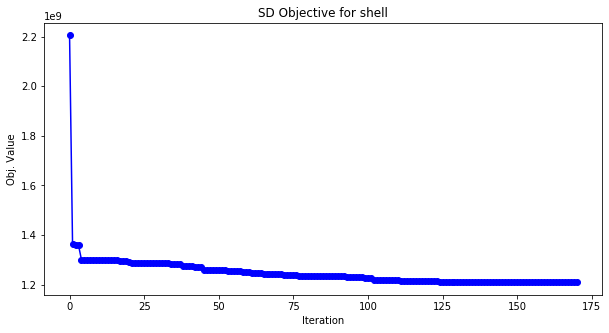

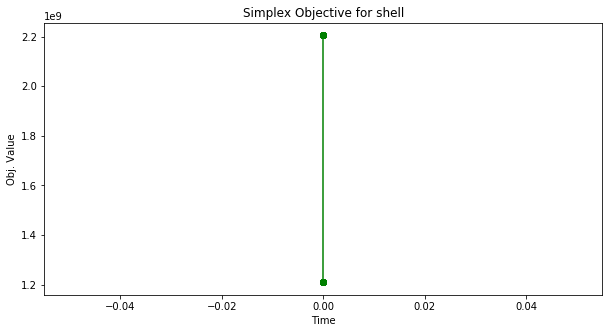

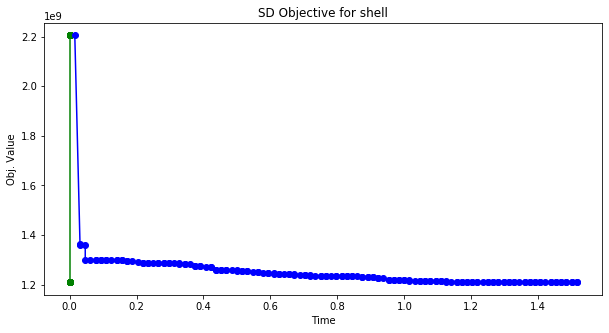






standgub


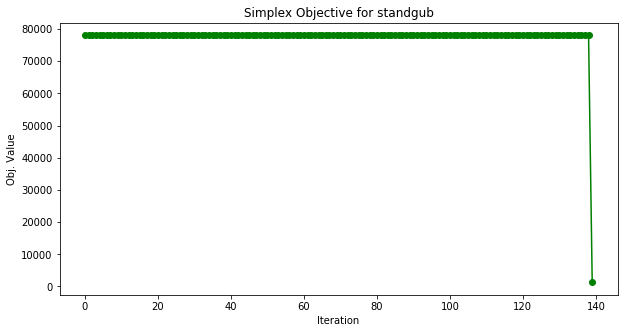

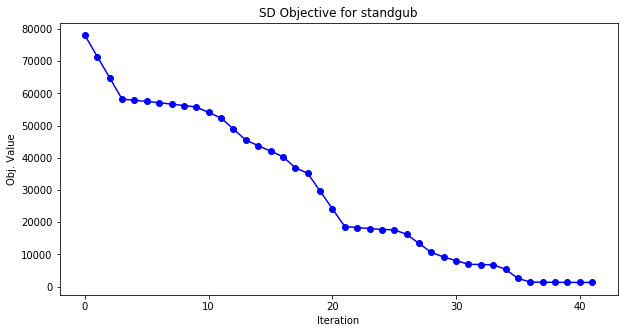

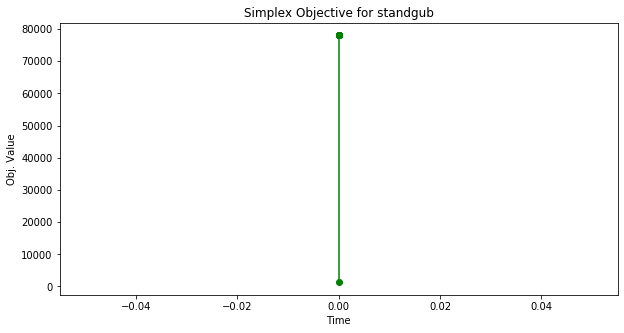

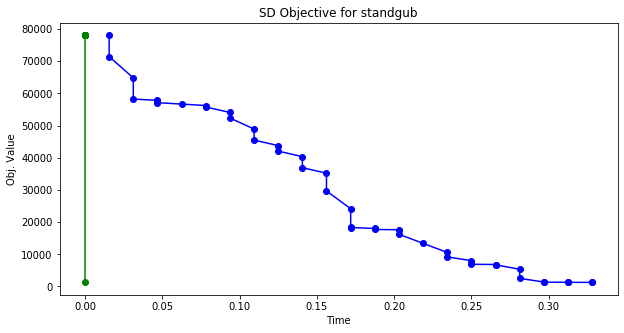






scagr7


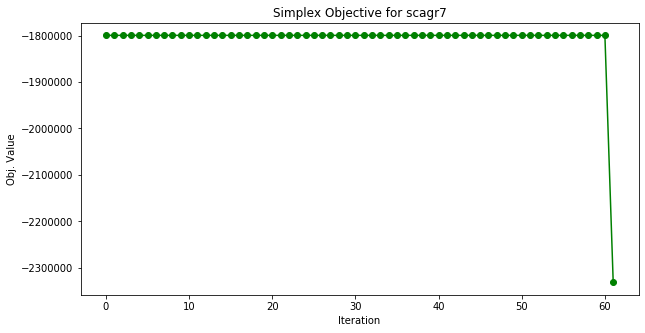

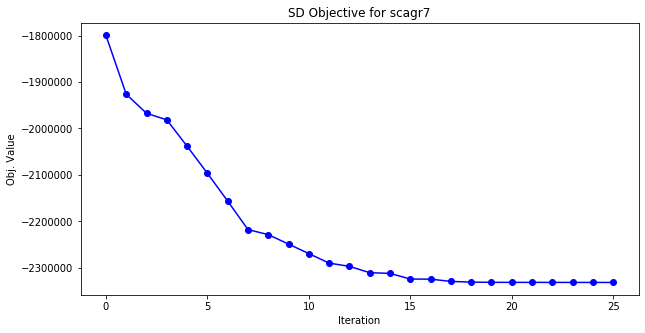

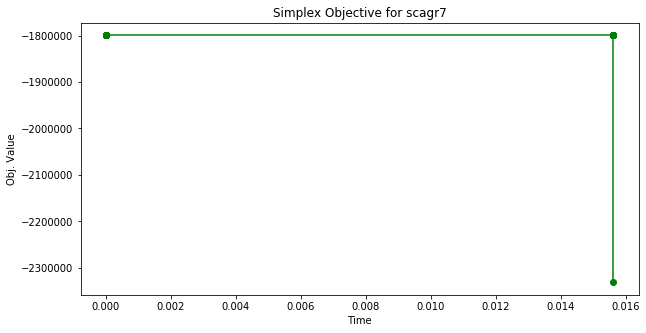

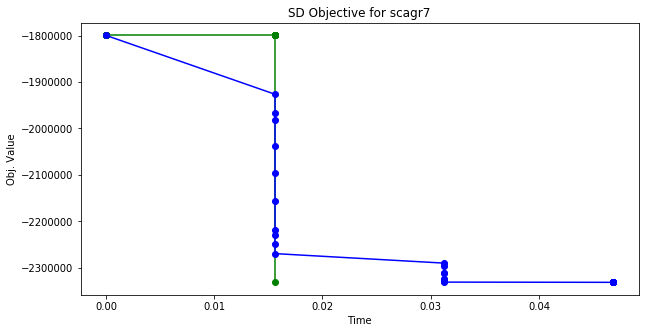






stocfor2


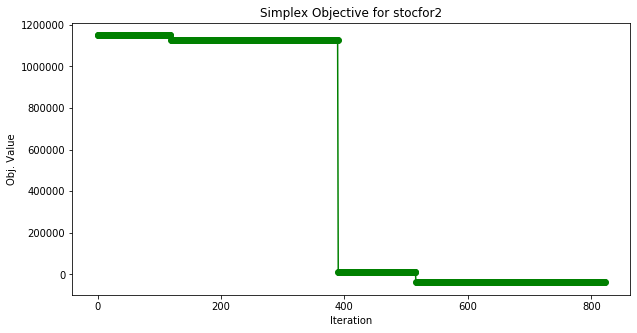

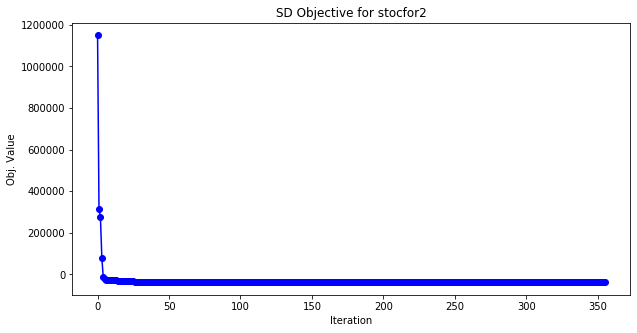

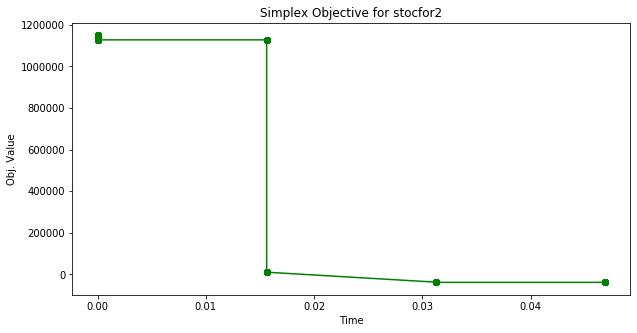

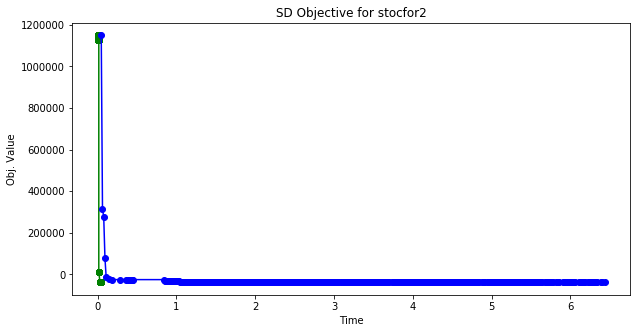






sctap2


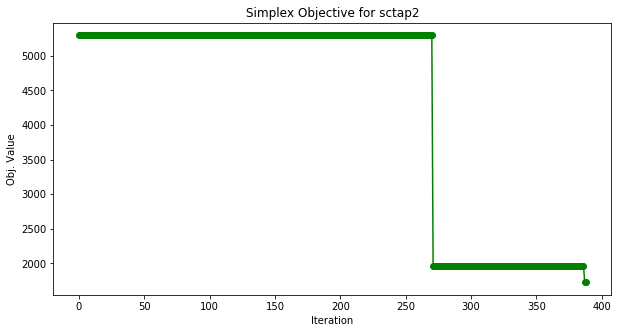

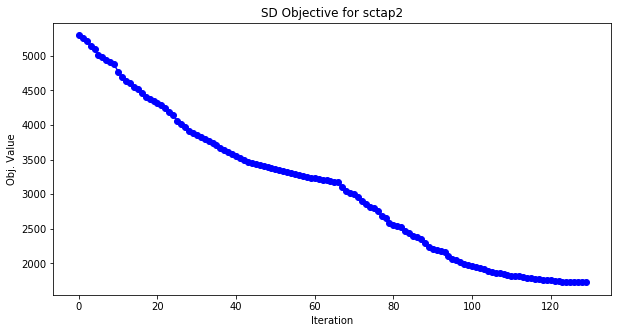

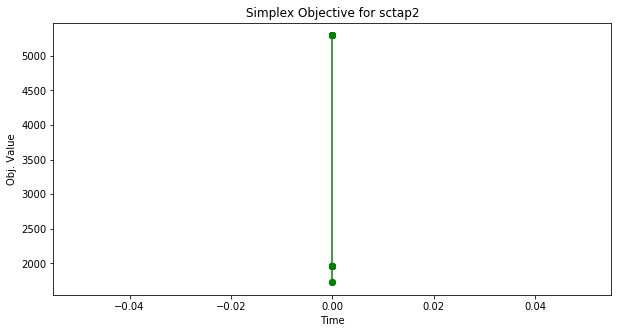

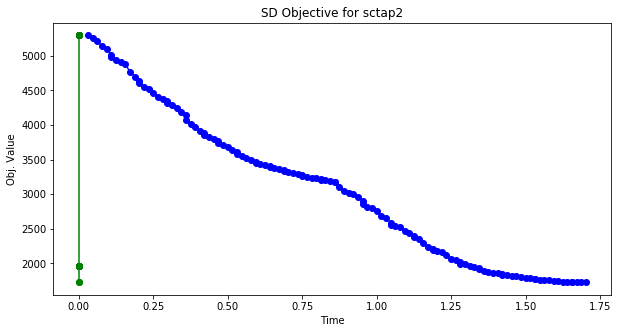






scorpion


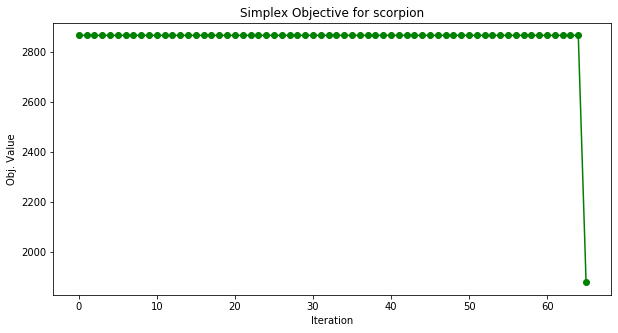

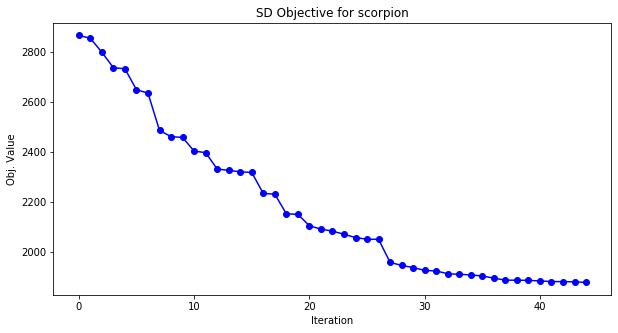

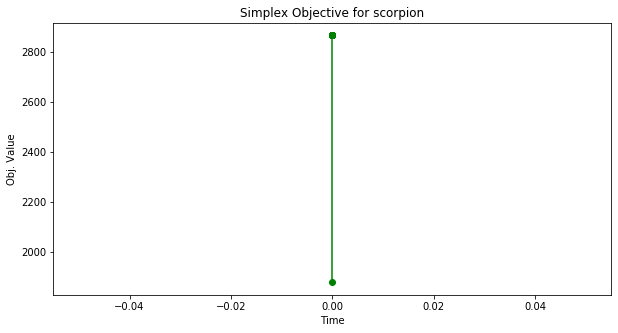

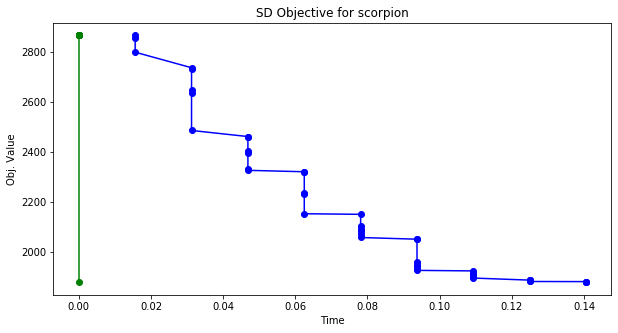






grow22


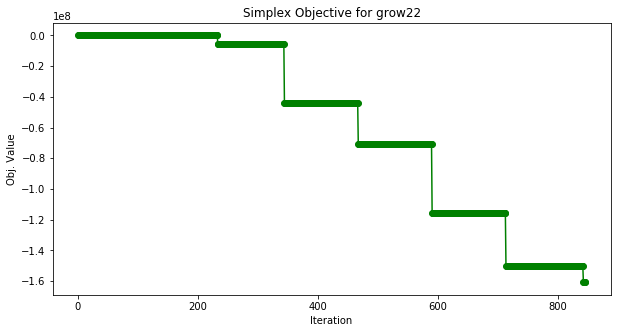

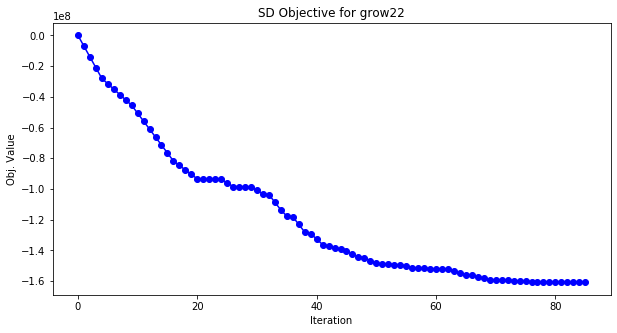

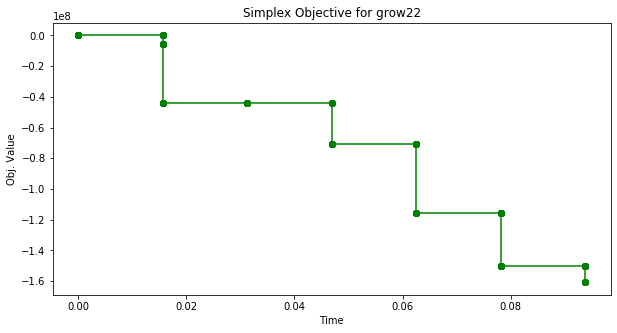

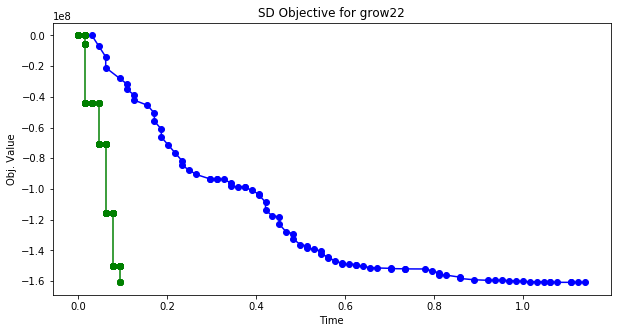






scsd1


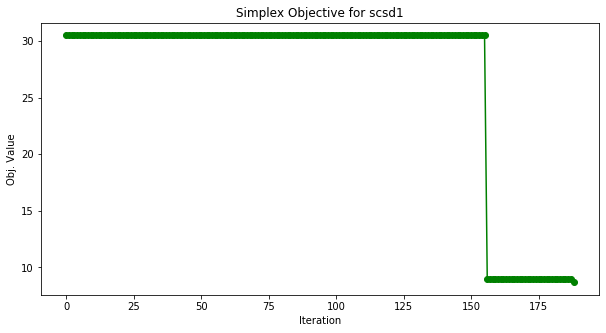

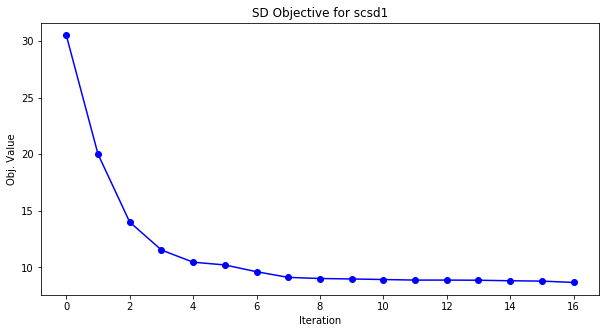

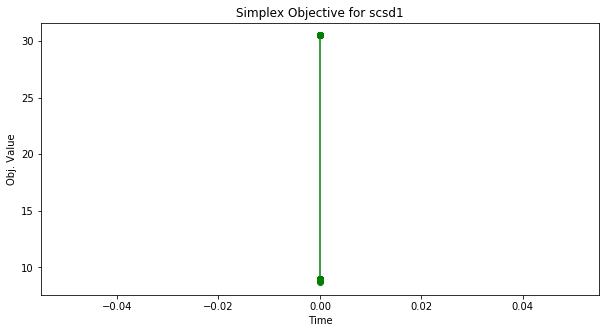

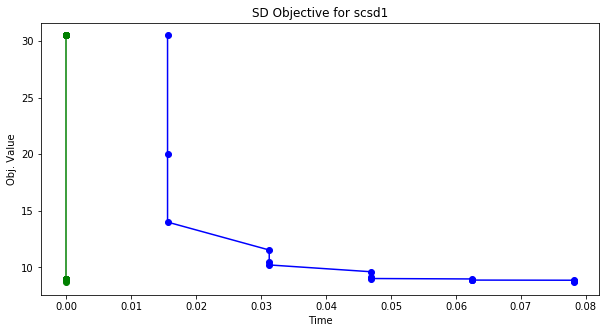






scfxm1


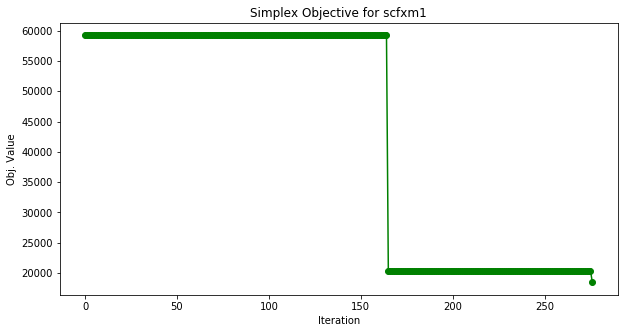

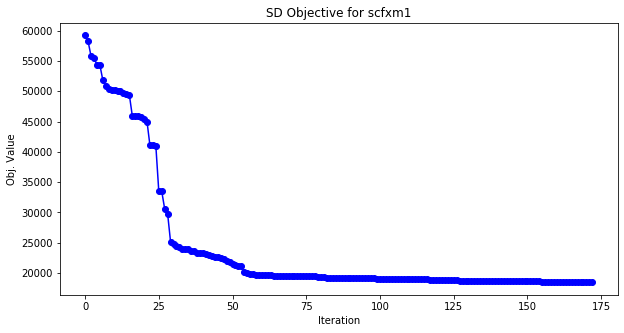

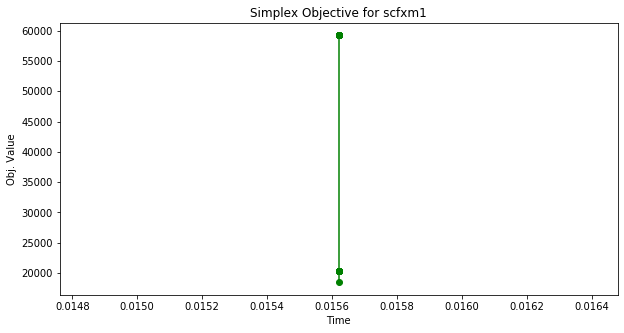

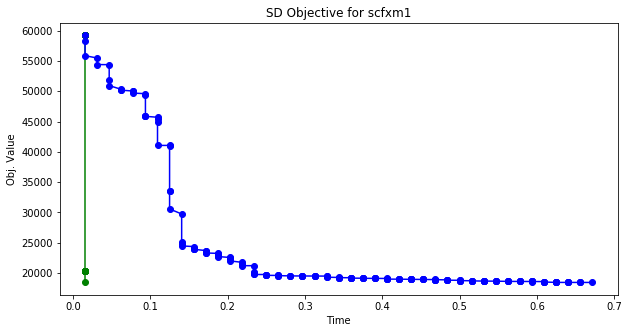

In [13]:
inds = list(range(len(sd_results_fns)))
random.shuffle(inds)
max_probs = 20


for ind in inds[:max_probs]:
    lp_fn = lp_results_fns[ind]
    sd_fn = sd_results_fns[ind]
    problem_name = os.path.basename(lp_fn).split('_')[0]
    print(problem_name)
    
    with open(lp_fn, 'rb') as f:
        lp_results = pickle.load(f)
    with open(sd_fn, 'rb') as f:
        sd_results = pickle.load(f)
        
    lp_results['obj_values'].append(lp_results['obj'])
    lp_results['iter_times'].append(lp_results['iter_times'][-1])
    plt.figure(figsize=(10,5))
    plt.title('Simplex Objective for {}'.format(problem_name))
    plt.xlabel('Iteration')
    plt.ylabel('Obj. Value')
    plt.plot(list(range(len(lp_results['obj_values']))), lp_results['obj_values'], 'go-')
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.title('SD Objective for {}'.format(problem_name))
    plt.xlabel('Iteration')
    plt.ylabel('Obj. Value')
    plt.plot(list(range(len(sd_results['obj_values']))), sd_results['obj_values'], 'bo-')
    plt.show()
      
    plt.figure(figsize=(10,5))
    plt.title('Simplex Objective for {}'.format(problem_name))
    plt.xlabel('Time')
    plt.ylabel('Obj. Value')
    plt.plot(lp_results['iter_times'], lp_results['obj_values'], 'go-')
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.title('SD Objective for {}'.format(problem_name))
    plt.xlabel('Time')
    plt.ylabel('Obj. Value')
    plt.plot(lp_results['iter_times'], lp_results['obj_values'], 'go-')
    plt.plot(sd_results['iter_times'], sd_results['obj_values'], 'bo-')
    plt.show()
    
    
    print('\n\n\n\n')
            
    

C:\Users\Chase\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


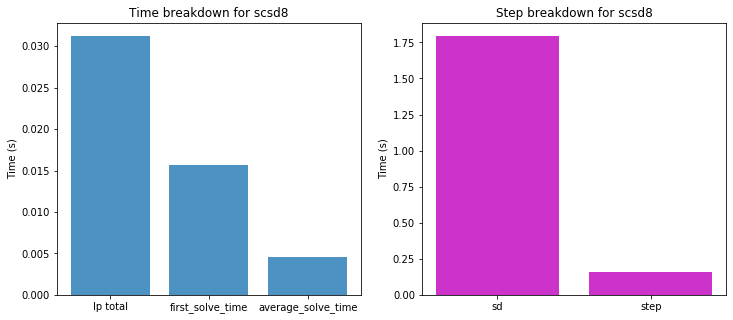

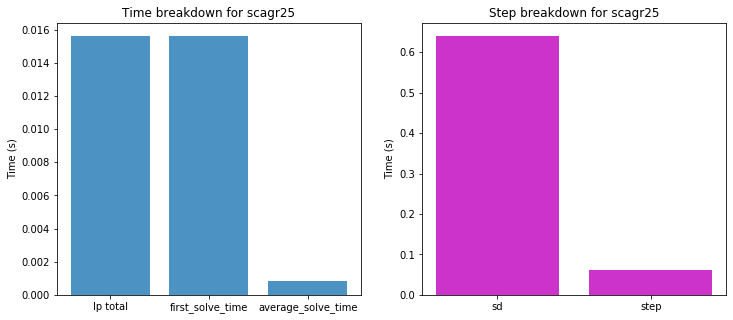

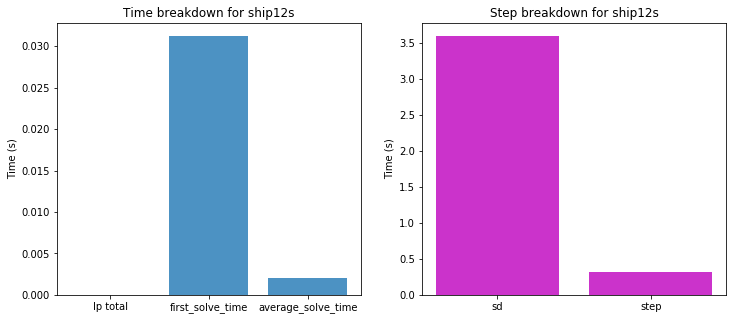

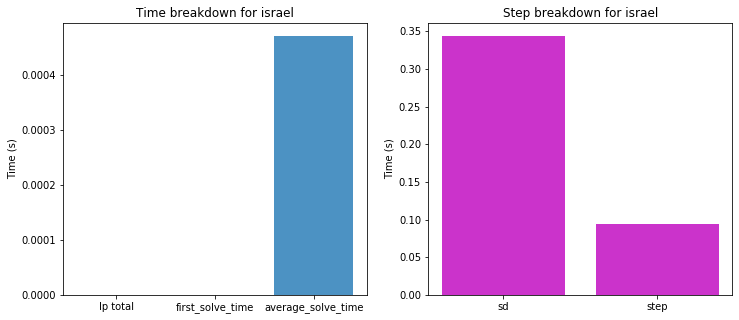

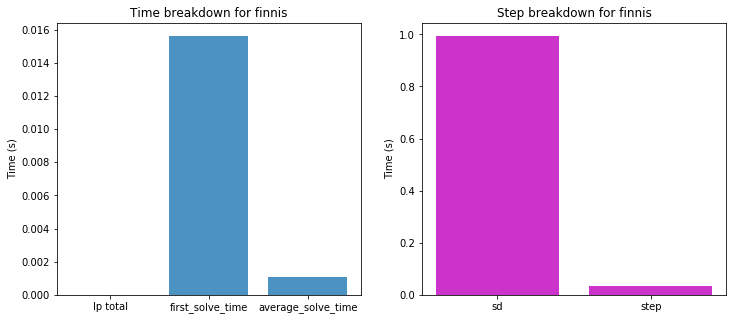

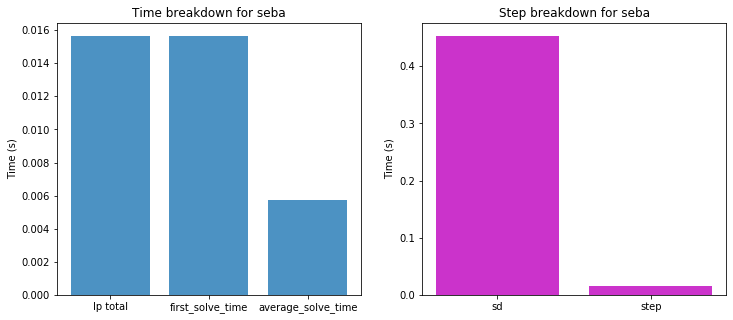

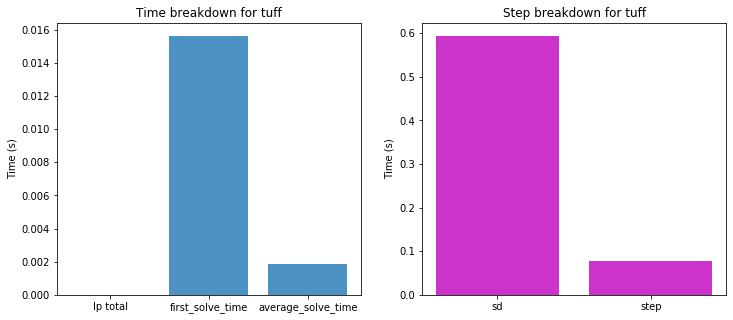

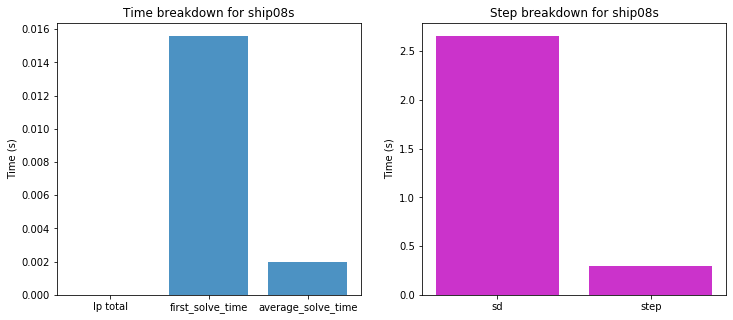

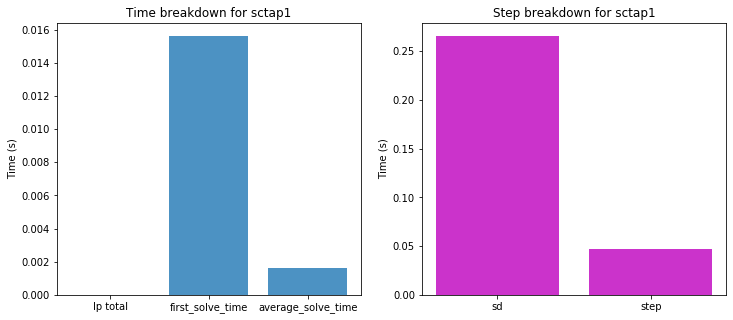

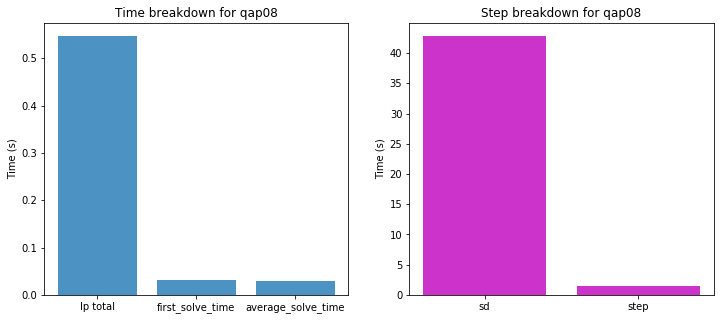

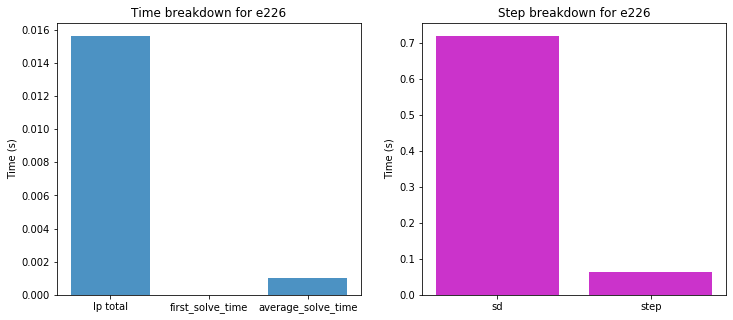

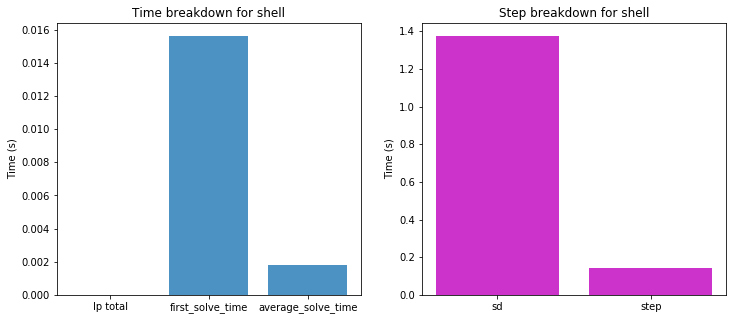

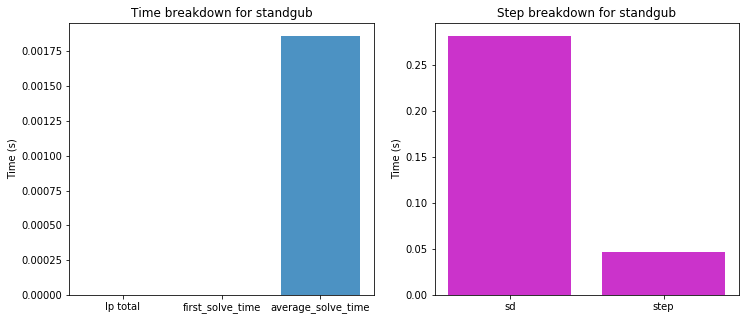

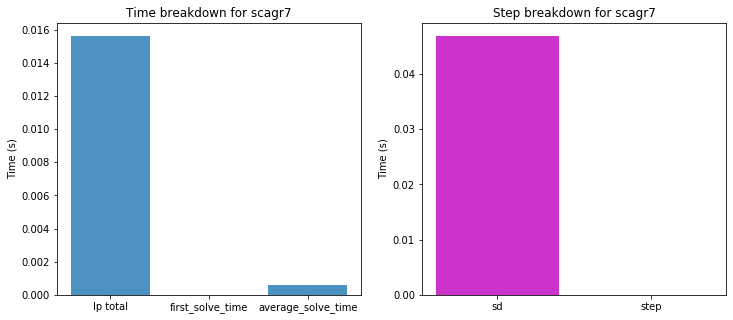

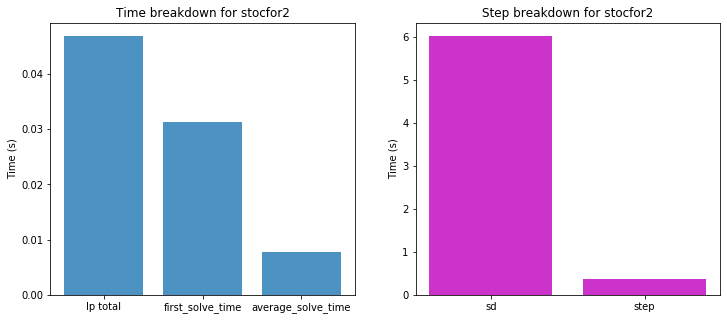

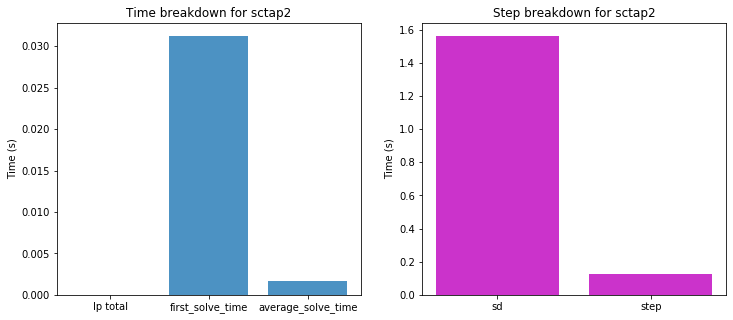

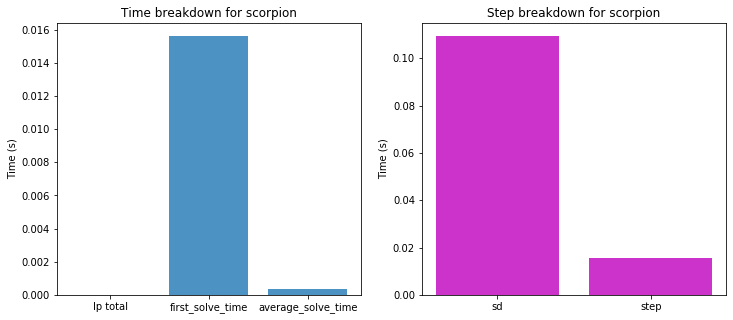

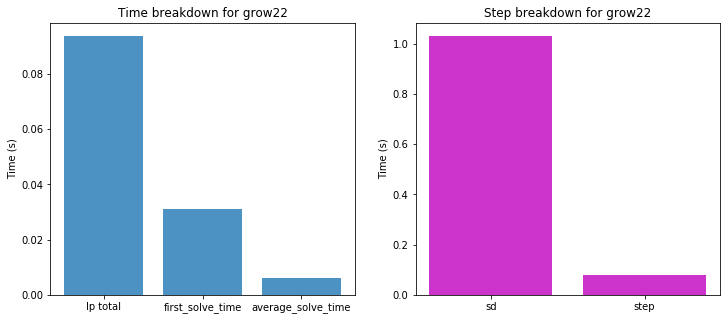

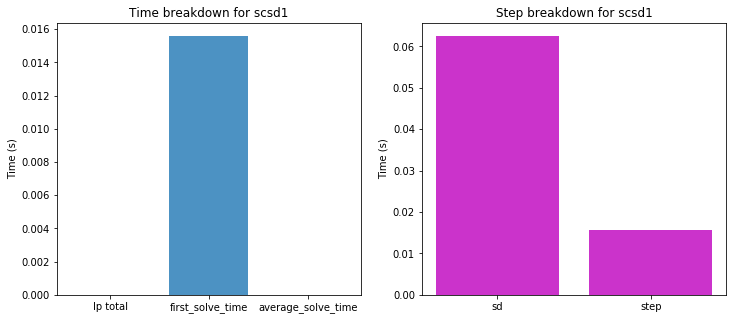

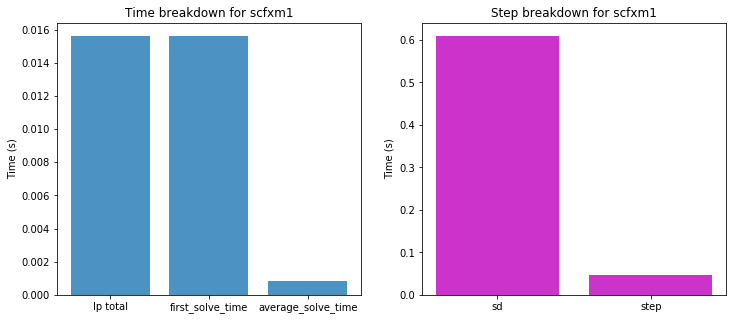

In [14]:
#inds = [0,1,2,3,4,5]
#inds = list(range(len(sd_results_fns)))
good_probs = []
max_solve_time = 200

for ind in inds[:max_probs]:
    lp_fn = lp_results_fns[ind]
    sd_fn = sd_results_fns[ind]
    problem_name = os.path.basename(lp_fn).split('_')[0]
    
    with open(lp_fn, 'rb') as f:
        lp_results = pickle.load(f)
    with open(sd_fn, 'rb') as f:
        sd_results = pickle.load(f)
        
    if sd_results['solve_time_total'] is None:
        continue
    if sd_results['solve_time_total'] > max_solve_time:
        continue
        
    good_probs.append(problem_name)
        
    times = {}
    #times['sd total'] = sd_results['solve_time_total']
    times['lp total'] = lp_results['solve_time_total']
    times['first_solve_time'] = sd_results['solve_times'][0]
    times['average_solve_time'] = avg(sd_results['solve_times'][1:])
    
    subtimes = {}
    subtimes['sd'] = sum(sd_results['sub_times']['sd'][1:])
    #subtimes['active_inds'] = sum(sd_results['sub_times']['active_inds'][1:])
    #subtimes['alpha'] = sum(sd_results['sub_times']['alpha'][1:])
    subtimes['step'] = sum(sd_results['sub_times']['step'][1:])
    #subtimes['solve'] = sum(sd_results['sub_times']['solve'][1:])
    
    
    time_types = [key for key in times]
    subtime_types = [key for key in subtimes]

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    ax1.set_title('Time breakdown for {}'.format(problem_name))
    ax1.set_ylabel('Time (s)')
    x_pos = np.arange(len(time_types))
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(time_types)
    values = [times[key] for key in times]
    ax1.bar(x_pos, values, align='center', alpha=0.8)

    ax2.set_title('Step breakdown for {}'.format(problem_name))
    ax2.set_ylabel('Time (s)')
    x_pos = np.arange(len(subtime_types))
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(subtime_types)
    values = [subtimes[key] for key in subtimes]
    ax2.bar(x_pos, values, align='center', alpha=0.8, color='m')
    f.show()  
    

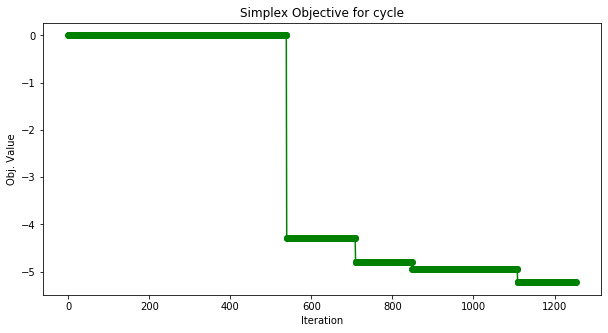

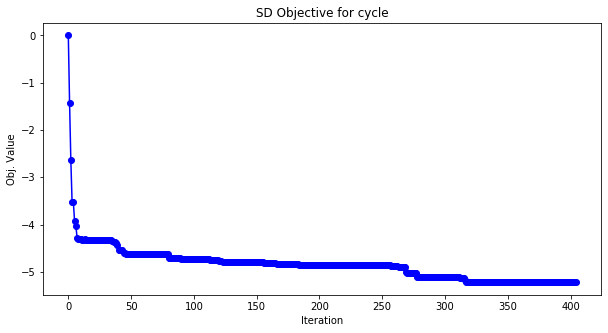

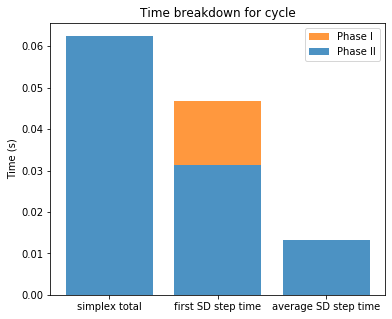

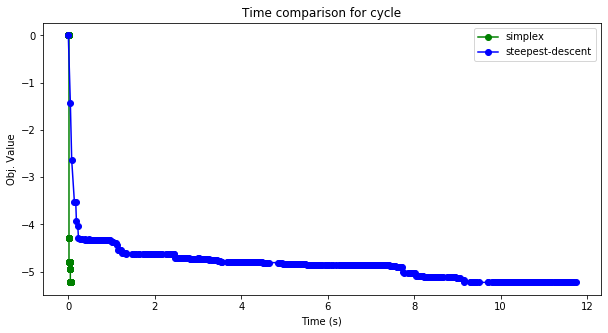

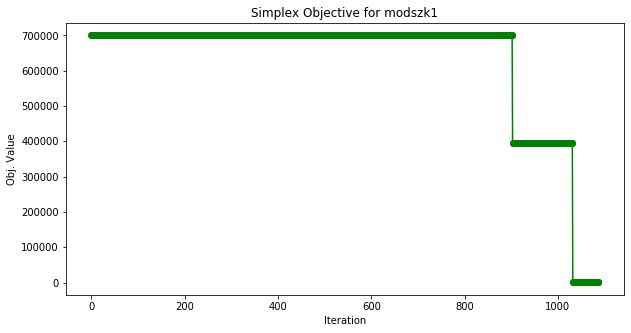

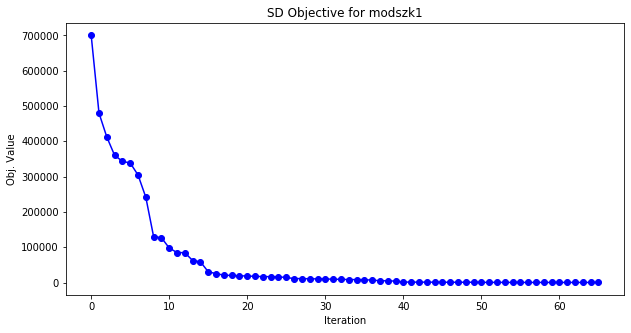

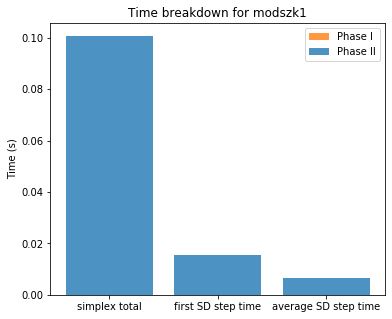

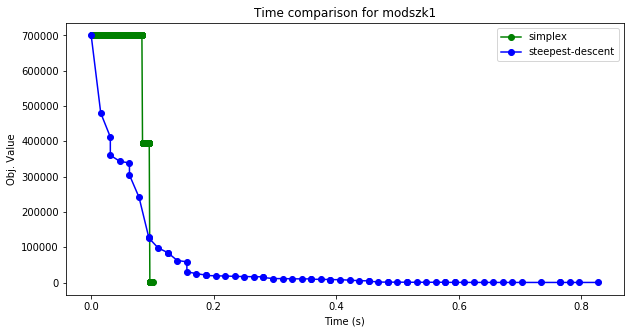

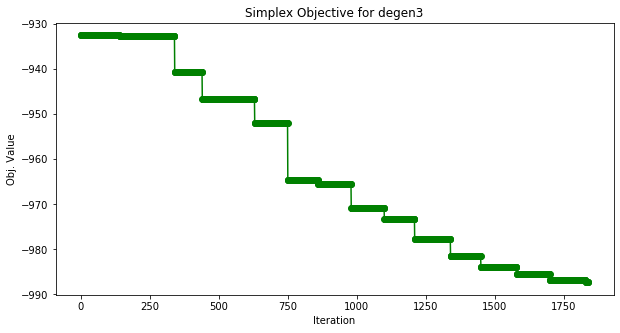

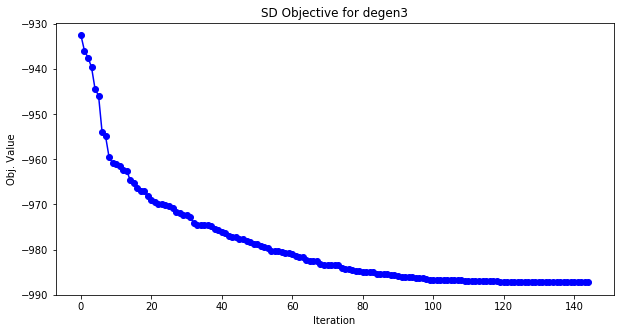

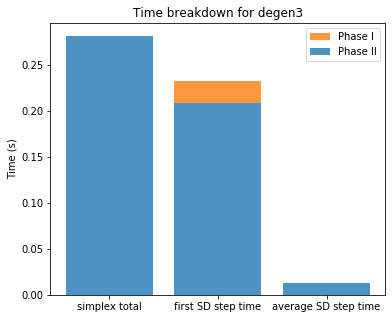

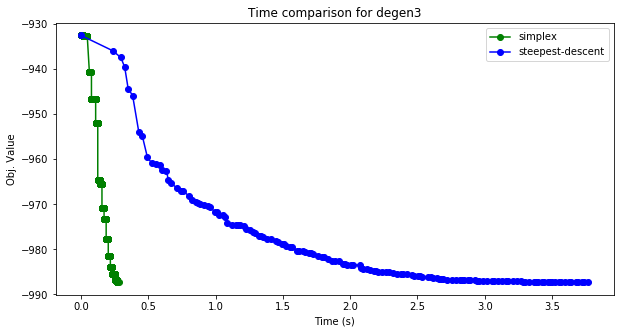

In [4]:
problems = ['stocfor2', 'cycle', 'modszk1', 'standmps', 'shell',
            'scagr25', 'scfxm2', 'etamacro', 'qap08', 'share1b',
            'grow15', 'grow22', 'grow7', 'cre-c', 'degen3']
problems = ['cycle', 'modszk1', 'degen3']
#problems = os.listdir('test_problems')
#problems = ['modszk1_0', 'modszk1_50', 'modszk1_10', 'modszk1_11']
#problems = ['modszk1']


results_dir = 'results_dual_simplex_phase1'
figure_dir = 'figs_final'
save_figs = True

if not os.path.exists(figure_dir): os.mkdir(figure_dir)
for problem in problems:
    lp_fn = os.path.join(results_dir, problem + '_lp.p')
    sd_fn = os.path.join(results_dir, problem + '_sd.p')
    if not os.path.exists(sd_fn): continue
    problem_name = problem
    
    with open(lp_fn, 'rb') as f:
        lp_results = pickle.load(f)
    with open(sd_fn, 'rb') as f:
        sd_results = pickle.load(f)
        
    lp_results['obj_values'].append(lp_results['obj'])  
    lp_results['iter_times'].append(lp_results['solve_time_total'])  
    plt.figure(figsize=(10,5))
    plt.title('Simplex Objective for {}'.format(problem_name))
    plt.xlabel('Iteration')
    plt.ylabel('Obj. Value')
    plt.plot(list(range(len(lp_results['obj_values']))), lp_results['obj_values'], 'go-')
    fn = os.path.join(figure_dir, '{}_{}_lp_iter.png'.format(problem, results_dir))
    if save_figs: plt.savefig(fname=fn)
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.title('SD Objective for {}'.format(problem_name))
    plt.xlabel('Iteration')
    plt.ylabel('Obj. Value')
    plt.plot(list(range(len(sd_results['obj_values']))), sd_results['obj_values'], 'bo-')
    fn = os.path.join(figure_dir, '{}_{}_sd_iter.png'.format(problem, results_dir))
    if save_figs: plt.savefig(fname=fn)
    plt.show()
    
    times = {}
    #times['sd total'] = sd_results['solve_time_total']
    times['simplex total'] = lp_results['solve_time_total']
    times['first SD step time'] = sd_results['solve_times'][0]
    times['average SD step time'] = avg(sd_results['solve_times'][1:])
    #times['first SD Phase1 time'] = sd_results['sub_times']['phase1_times'][0]
    phase1_time = sd_results['sub_times']['phase1_times'][0]
    phase1_times = [0, phase1_time, 0]
    times['first SD step time'] -= phase1_time
    
    time_types = [key for key in times]

    #f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    plt.figure(figsize=(6,5))
    plt.title('Time breakdown for {}'.format(problem_name))
    plt.ylabel('Time (s)')
    x_pos = np.arange(len(time_types))
    plt.xticks(x_pos, time_types)
    values = [times[key] for key in times]
    p2 = plt.bar(x_pos, values, align='center', alpha=0.8)
    p1 = plt.bar(x_pos, phase1_times, bottom=values, align='center', alpha=0.8)
    fn = os.path.join(figure_dir, '{}_{}_time_breakdown.png'.format(problem, results_dir))
    plt.legend((p1[0], p2[0]), ('Phase I', 'Phase II'))
    plt.ylim(top=times['simplex total']*1.05)
    if save_figs: plt.savefig(fname=fn)
    plt.show()

    #ax2.set_title('Step breakdown for {}'.format(problem_name))
    #ax2.set_ylabel('Time (s)')
    #x_pos = np.arange(len(subtime_types))
    #ax2.set_xticks(x_pos)
    #ax2.set_xticklabels(subtime_types)
    #values = [subtimes[key] for key in subtimes]
    #ax2.bar(x_pos, values, align='center', alpha=0.8, color='m')
    #f.show()  
    
    plt.figure(figsize=(10,5))
    plt.title('Time comparison for {}'.format(problem_name))
    plt.xlabel('Time (s)')
    plt.ylabel('Obj. Value')
    plt.plot(lp_results['iter_times'], lp_results['obj_values'], 'go-', label='simplex')
    plt.plot(sd_results['iter_times'], sd_results['obj_values'], 'bo-', label='steepest-descent')
    plt.legend(loc='upper right')
    fn = os.path.join(figure_dir, '{}_{}_time_comp.png'.format(problem, results_dir))
    if save_figs: plt.savefig(fname=fn)
    plt.show()
    

In [10]:
print(sd_results['sub_times']['phase1_times'])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01562047004699707, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015621185302734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015621423721313477, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [12]:
#problems = ['stocfor2', 'cycle', 'modszk1', 'standmps', 'shell',
#            'scagr25', 'scfxm2', 'etamacro', 'qap08', 'share1b',
#            'grow15', 'grow22', 'grow7']
results_dir = 'results5'
problems = ['adlittle', 'afiro', 'agg2','agg3','agg', 'bandm',
 'beaconfd', 'blend', 'bnl1', 'boeing1', 'boeing2', 'bore3d', 'brandy', 'capri',
 'cre-c', 'cycle', 'degen2', 'degen3', 'e226', 'etamacro', 'fffff800', 'finnis',
 'fit1d', 'fit1p', 'forplan', 'ganges', 'gfrd-pnc', 'grow15', 'grow22', 'grow7',
 'israel', 'kb2', 'ken-07', 'lotfi', 'maros', 'modszk1', 'pds-02', 'perold',
 'pilot4', 'pilotnov', 'pilot', 'qap08', 'recipe', 'sc105', 'sc205', 'sc50a',
 'sc50b', 'scagr25', 'scagr7', 'scfxm1', 'scfxm2', 'scfxm3', 'scorpion', 'scrs8',
 'scsd1', 'scsd6', 'scsd8', 'sctap1', 'sctap2', 'sctap3', 'seba', 'share1b',
 'share2b', 'shell', 'ship04l', 'ship04s', 'ship08l', 'ship08s', 'ship12l', 'ship12s',
 'sierra', 'stair', 'standata', 'standgub', 'standmps', 'stocfor1', 'stocfor2', 'tuff',
 'vtp_base', 'wood1p']     


avgs = {'lp_time': [], 'sd_time': [], 'first_sd': [], 'avg_sd': []}
from statistics import median

figure_dir = 'figures'
if not os.path.exists(figure_dir): os.mkdir(figure_dir)
for problem in problems:
    lp_fn = os.path.join(results_dir, problem + '_lp.p')
    sd_fn = os.path.join(results_dir, problem + '_sd.p')
    if not os.path.exists(sd_fn): continue
    
    with open(lp_fn, 'rb') as f:
        lp_results = pickle.load(f)
    with open(sd_fn, 'rb') as f:
        sd_results = pickle.load(f)
        
    try: 
        avgs['first_sd'].append(sd_results['solve_times'][0])
        avgs['avg_sd'].append(avg(sd_results['solve_times'][0:]))
        avgs['lp_time'].append(lp_results['solve_time_total'])
        avgs['sd_time'].append(sd_results['solve_time_total'])
    except KeyError:
        print('skipping {}'.format(problem))
        continue
        
for metric in avgs:
    print('Average {}: {}'.format(metric, avg(avgs[metric])))
    print('Median {}: {}'.format(metric, median(avgs[metric])))

skipping pilot
Average lp_time: 0.0676167463954491
Median lp_time: 0.0156252384185791
Average sd_time: 8.259313740307771
Median sd_time: 1.6789252758026123
Average first_sd: 0.05584830272046826
Median first_sd: 0.023029327392578125
Average avg_sd: 0.00735813771306382
Median avg_sd: 0.003500886015839629


In [3]:
#problems = ['stocfor2', 'cycle', 'modszk1', 'standmps', 'shell',
#            'scagr25', 'scfxm2', 'etamacro', 'qap08', 'share1b',
#            'grow15', 'grow22', 'grow7']
results_dir = 'results6'
problems = ['adlittle', 'afiro', 'agg2','agg3','agg', 'bandm',
 'beaconfd', 'blend', 'bnl1', 'boeing1', 'boeing2', 'bore3d', 'brandy', 'capri',
 'cre-c', 'cycle', 'degen2', 'degen3', 'e226', 'etamacro', 'fffff800', 'finnis',
 'fit1d', 'fit1p', 'forplan', 'ganges', 'gfrd-pnc', 'grow15', 'grow22', 'grow7',
 'israel', 'kb2', 'ken-07', 'lotfi', 'maros', 'modszk1', 'pds-02', 'perold',
 'pilot4', 'pilotnov', 'pilot', 'qap08', 'recipe', 'sc105', 'sc205', 'sc50a',
 'sc50b', 'scagr25', 'scagr7', 'scfxm1', 'scfxm2', 'scfxm3', 'scorpion', 'scrs8',
 'scsd1', 'scsd6', 'scsd8', 'sctap1', 'sctap2', 'sctap3', 'seba', 'share1b',
 'share2b', 'shell', 'ship04l', 'ship04s', 'ship08l', 'ship08s', 'ship12l', 'ship12s',
 'sierra', 'stair', 'standata', 'standgub', 'standmps', 'stocfor1', 'stocfor2', 'tuff',
 'vtp_base', 'wood1p']     


avgs = {'lp_time': [], 'sd_time': [], 'first_sd': [], 'avg_sd': [],
        'lp_iters': [], 'sd_iters': []}
from statistics import median

figure_dir = 'figures'
if not os.path.exists(figure_dir): os.mkdir(figure_dir)
for problem in problems:
    lp_fn = os.path.join(results_dir, problem + '_lp.p')
    sd_fn = os.path.join(results_dir, problem + '_sd.p')
    if not os.path.exists(sd_fn): continue
    
    with open(lp_fn, 'rb') as f:
        lp_results = pickle.load(f)
    with open(sd_fn, 'rb') as f:
        sd_results = pickle.load(f)
        
    try: 
        avgs['first_sd'].append(sd_results['solve_times'][0])
        avgs['avg_sd'].append(avg(sd_results['solve_times'][1:]))
        avgs['lp_time'].append(lp_results['solve_time_total'])
        avgs['sd_time'].append(sd_results['solve_time_total'])
        avgs['lp_iters'].append(lp_results['n_iters'])
        avgs['sd_iters'].append(sd_results['n_iters'])
    except KeyError:
        print('skipping {}'.format(problem))
        continue
        
for metric in avgs:
    print('Average {}: {}'.format(metric, avg(avgs[metric])))
    print('Median {}: {}'.format(metric, median(avgs[metric])))

Average lp_time: 0.03222894064987762
Median lp_time: 0.010060548782348633
Average sd_time: 3.995421614827989
Median sd_time: 1.1447649002075195
Average first_sd: 0.03335320195065269
Median first_sd: 0.015625
Average avg_sd: 0.003662154175117501
Median avg_sd: 0.0020800272623697916
Average lp_iters: 452.60759493670884
Median lp_iters: 285.0
Average sd_iters: 231.59493670886076
Median sd_iters: 137


In [2]:
#problems = ['stocfor2', 'cycle', 'modszk1', 'standmps', 'shell',
#            'scagr25', 'scfxm2', 'etamacro', 'qap08', 'share1b',
#            'grow15', 'grow22', 'grow7']
results_dir = 'results_barrier'
problems = ['adlittle', 'afiro', 'agg2','agg3','agg', 'bandm',
 'beaconfd', 'blend', 'bnl1', 'boeing1', 'boeing2', 'bore3d', 'brandy', 'capri',
 'cre-c', 'cycle', 'degen2', 'degen3', 'e226', 'etamacro', 'fffff800', 'finnis',
 'fit1d', 'fit1p', 'forplan', 'ganges', 'gfrd-pnc', 'grow15', 'grow22', 'grow7',
 'israel', 'kb2', 'ken-07', 'lotfi', 'maros', 'modszk1', 'pds-02', 'perold',
 'pilot4', 'pilotnov', 'pilot', 'qap08', 'recipe', 'sc105', 'sc205', 'sc50a',
 'sc50b', 'scagr25', 'scagr7', 'scfxm1', 'scfxm2', 'scfxm3', 'scorpion', 'scrs8',
 'scsd1', 'scsd6', 'scsd8', 'sctap1', 'sctap2', 'sctap3', 'seba', 'share1b',
 'share2b', 'shell', 'ship04l', 'ship04s', 'ship08l', 'ship08s', 'ship12l', 'ship12s',
 'sierra', 'stair', 'standata', 'standgub', 'standmps', 'stocfor1', 'stocfor2', 'tuff',
 'vtp_base', 'wood1p']     


avgs = {'lp_time': [], 'sd_time': [], 'first_sd': [], 'avg_sd': [], 'sd_iters': []}
from statistics import median

figure_dir = 'figures'
if not os.path.exists(figure_dir): os.mkdir(figure_dir)
for problem in problems:
    lp_fn = os.path.join(results_dir, problem + '_lp.p')
    sd_fn = os.path.join(results_dir, problem + '_sd.p')
    if not os.path.exists(sd_fn): continue
    
    with open(lp_fn, 'rb') as f:
        lp_results = pickle.load(f)
    with open(sd_fn, 'rb') as f:
        sd_results = pickle.load(f)
        
    try: 
        avgs['first_sd'].append(sd_results['solve_times'][0])
        avgs['avg_sd'].append(avg(sd_results['solve_times'][0:]))
        avgs['lp_time'].append(lp_results['solve_time_total'])
        avgs['sd_time'].append(sd_results['solve_time_total'])
        avgs['sd_iters'].append(sd_results['n_iters'])
    except KeyError:
        print('skipping {}'.format(problem))
        continue
        
for metric in avgs:
    print('Average {}: {}'.format(metric, avg(avgs[metric])))
    print('Median {}: {}'.format(metric, median(avgs[metric])))

skipping cycle
skipping maros
skipping perold
skipping pilot4
skipping pilotnov
Average lp_time: 0.025307346034694363
Median lp_time: 0.0
Average sd_time: 9.242759756139806
Median sd_time: 3.1087476015090942
Average first_sd: 0.02420141890242293
Median first_sd: 0.015623092651367188
Average avg_sd: 0.02738356414845834
Median avg_sd: 0.018218026957359565
Average sd_iters: 171.13513513513513
Median sd_iters: 119.0


In [3]:
#problems = ['stocfor2', 'cycle', 'modszk1', 'standmps', 'shell',
#            'scagr25', 'scfxm2', 'etamacro', 'qap08', 'share1b',
#            'grow15', 'grow22', 'grow7']
results_dir = 'results_primal_simplex'
problems = ['adlittle', 'afiro', 'agg2','agg3','agg', 'bandm',
 'beaconfd', 'blend', 'bnl1', 'boeing1', 'boeing2', 'bore3d', 'brandy', 'capri',
 'cre-c', 'cycle', 'degen2', 'degen3', 'e226', 'etamacro', 'fffff800', 'finnis',
 'fit1d', 'fit1p', 'forplan', 'ganges', 'gfrd-pnc', 'grow15', 'grow22', 'grow7',
 'israel', 'kb2', 'ken-07', 'lotfi', 'maros', 'modszk1', 'pds-02', 'perold',
 'pilot4', 'pilotnov', 'pilot', 'qap08', 'recipe', 'sc105', 'sc205', 'sc50a',
 'sc50b', 'scagr25', 'scagr7', 'scfxm1', 'scfxm2', 'scfxm3', 'scorpion', 'scrs8',
 'scsd1', 'scsd6', 'scsd8', 'sctap1', 'sctap2', 'sctap3', 'seba', 'share1b',
 'share2b', 'shell', 'ship04l', 'ship04s', 'ship08l', 'ship08s', 'ship12l', 'ship12s',
 'sierra', 'stair', 'standata', 'standgub', 'standmps', 'stocfor1', 'stocfor2', 'tuff',
 'vtp_base', 'wood1p']     


avgs = {'lp_time': [], 'sd_time': [], 'first_sd': [], 'avg_sd': [], 'sd_iters': []}
from statistics import median

figure_dir = 'figures'
if not os.path.exists(figure_dir): os.mkdir(figure_dir)
for problem in problems:
    lp_fn = os.path.join(results_dir, problem + '_lp.p')
    sd_fn = os.path.join(results_dir, problem + '_sd.p')
    if not os.path.exists(sd_fn): continue
    
    with open(lp_fn, 'rb') as f:
        lp_results = pickle.load(f)
    with open(sd_fn, 'rb') as f:
        sd_results = pickle.load(f)
        
    try: 
        avgs['first_sd'].append(sd_results['solve_times'][0])
        avgs['avg_sd'].append(avg(sd_results['solve_times'][0:]))
        avgs['lp_time'].append(lp_results['solve_time_total'])
        avgs['sd_time'].append(sd_results['solve_time_total'])
        avgs['sd_iters'].append(sd_results['n_iters'])
    except KeyError:
        print('skipping {}'.format(problem))
        continue
        
for metric in avgs:
    print('Average {}: {}'.format(metric, avg(avgs[metric])))
    print('Median {}: {}'.format(metric, median(avgs[metric])))

skipping cycle
skipping pilotnov
skipping tuff
Average lp_time: 0.027664771205500552
Median lp_time: 0.015587687492370605
Average sd_time: 17.054711686937434
Median sd_time: 1.8138604164123535
Average first_sd: 0.033088081761410364
Median first_sd: 0.015621185302734375
Average avg_sd: 0.02537400270956618
Median avg_sd: 0.005895355947656569
Average sd_iters: 234.05263157894737
Median sd_iters: 134.5


In [40]:
import os
import pickle
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline
from utils import avg

#problems = ['stocfor2', 'cycle', 'modszk1', 'standmps', 'shell',
#            'scagr25', 'scfxm2', 'etamacro', 'qap08', 'share1b',
#            'grow15', 'grow22', 'grow7']
results_dir = 'results_dual_simplex_phases'
problems = ['adlittle', 'afiro', 'agg2','agg3','agg', 'bandm',
 'beaconfd', 'blend', 'bnl1', 'boeing1', 'boeing2', 'bore3d', 'brandy', 'capri',
 'cre-c', 'cycle', 'degen2', 'degen3', 'e226', 'etamacro', 'fffff800', 'finnis',
 'fit1d', 'fit1p', 'forplan', 'ganges', 'gfrd-pnc', 'grow15', 'grow22', 'grow7',
 'israel', 'kb2', 'ken-07', 'lotfi', 'maros', 'modszk1', 'pds-02', 'perold',
 'pilot4', 'pilotnov', 'pilot', 'qap08', 'recipe', 'sc105', 'sc205', 'sc50a',
 'sc50b', 'scagr25', 'scagr7', 'scfxm1', 'scfxm2', 'scfxm3', 'scorpion', 'scrs8',
 'scsd1', 'scsd6', 'scsd8', 'sctap1', 'sctap2', 'sctap3', 'seba', 'share1b',
 'share2b', 'shell', 'ship04l', 'ship04s', 'ship08l', 'ship08s', 'ship12l', 'ship12s',
 'sierra', 'stair', 'standata', 'standgub', 'standmps', 'stocfor1', 'stocfor2', 'tuff',
 'vtp_base', 'wood1p']     


avgs = {'lp_time': [], 'sd_time': [], 'first_sd': [], 'avg_sd': [], 'sd_iters': [], 'phase1_times': [],
       'phase2_times': []}
from statistics import median

figure_dir = 'figures'
if not os.path.exists(figure_dir): os.mkdir(figure_dir)
for problem in problems:
    lp_fn = os.path.join(results_dir, problem + '_lp.p')
    sd_fn = os.path.join(results_dir, problem + '_sd.p')
    if not os.path.exists(sd_fn): continue
    
    with open(lp_fn, 'rb') as f:
        lp_results = pickle.load(f)
    with open(sd_fn, 'rb') as f:
        sd_results = pickle.load(f)
        
    try: 
        avgs['first_sd'].append(sd_results['solve_times'][0])
        avgs['avg_sd'].append(avg(sd_results['solve_times'][0:]))
        avgs['lp_time'].append(lp_results['solve_time_total'])
        avgs['sd_time'].append(sd_results['solve_time_total'])
        avgs['sd_iters'].append(sd_results['n_iters'])
        avgs['phase1_times'].append(sd_results['sub_times']['phase_times'][0][0])
        avgs['phase2_times'].append(sd_results['sub_times']['phase_times'][0][1])
    except KeyError:
        print('skipping {}'.format(problem))
        continue
        
for metric in avgs:
    print('Average {}: {}'.format(metric, avg(avgs[metric])))
    print('Median {}: {}'.format(metric, median(avgs[metric])))

Average lp_time: 0.03251947330523141
Median lp_time: 0.015619516372680664
Average sd_time: 4.44813056233563
Median sd_time: 1.0778698921203613
Average first_sd: 0.0311483552184286
Median first_sd: 0.015621185302734375
Average avg_sd: 0.004101794628333124
Median avg_sd: 0.00225951454856179
Average sd_iters: 231.59493670886076
Median sd_iters: 137
Average phase1_times: 0.00797212878360024
Median phase1_times: 0.0
Average phase2_times: 1572826370.7723687
Median phase2_times: 1572826445.8425176


In [28]:
import os
import pickle
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline
from utils import avg

#problems = ['stocfor2', 'cycle', 'modszk1', 'standmps', 'shell',
#            'scagr25', 'scfxm2', 'etamacro', 'qap08', 'share1b',
#            'grow15', 'grow22', 'grow7']
results_dir = 'results_dual_simplex_phase1'
problems = ['adlittle', 'afiro', 'agg2','agg3','agg', 'bandm',
 'beaconfd', 'blend', 'bnl1', 'boeing1', 'boeing2', 'bore3d', 'brandy', 'capri',
 'cre-c', 'cycle', 'degen2', 'degen3', 'e226', 'etamacro', 'fffff800', 'finnis',
 'fit1d', 'fit1p', 'forplan', 'ganges', 'gfrd-pnc', 'grow15', 'grow22', 'grow7',
 'israel', 'kb2', 'ken-07', 'lotfi', 'maros', 'modszk1', 'pds-02', 'perold',
 'pilot4', 'pilotnov', 'pilot', 'qap08', 'recipe', 'sc105', 'sc205', 'sc50a',
 'sc50b', 'scagr25', 'scagr7', 'scfxm1', 'scfxm2', 'scfxm3', 'scorpion', 'scrs8',
 'scsd1', 'scsd6', 'scsd8', 'sctap1', 'sctap2', 'sctap3', 'seba', 'share1b',
 'share2b', 'shell', 'ship04l', 'ship04s', 'ship08l', 'ship08s', 'ship12l', 'ship12s',
 'sierra', 'stair', 'standata', 'standgub', 'standmps', 'stocfor1', 'stocfor2', 'tuff',
 'vtp_base', 'wood1p']     


avgs = {'lp_time': [], 'sd_time': [], 'first_sd': [], 'avg_sd': [], 'sd_iters': [], 'phase1_times': [],
        'sd_time_eps': [], 'sd_iters_eps': [], 'lp_time_eps': [], 'lp_iters_eps': [],}
from statistics import median

figure_dir = 'figures'
if not os.path.exists(figure_dir): os.mkdir(figure_dir)
for problem in problems:
    lp_fn = os.path.join(results_dir, problem + '_lp.p')
    sd_fn = os.path.join(results_dir, problem + '_sd.p')
    if not os.path.exists(sd_fn): continue
    
    with open(lp_fn, 'rb') as f:
        lp_results = pickle.load(f)
    with open(sd_fn, 'rb') as f:
        sd_results = pickle.load(f)
        
    try: 
        avgs['first_sd'].append(sd_results['solve_times'][0])
        avgs['avg_sd'].append(avg(sd_results['solve_times'][0:]))
        avgs['lp_time'].append(lp_results['solve_time_total'])
        avgs['phase1_times'].append(sd_results['sub_times']['phase1_times'][0])
        avgs['sd_time'].append(sd_results['solve_time_total'])
        avgs['sd_iters'].append(sd_results['n_iters'])
        
        eps = 0.05
        obj_opt = lp_results['obj']       
        obj_eps = lp_results['obj'] * eps
        if obj_opt < 0: obj_eps *= -1
            
        ind = None
        for i, obj in enumerate(sd_results['obj_values']):
            if obj <= obj_opt + obj_eps:
                ind = i
                break
        if ind is not None:
            avgs['sd_time_eps'].append(sd_results['iter_times'][ind])
            avgs['sd_iters_eps'].append(ind)
            
        ind = None
        lp_results['obj_values'].append(lp_results['obj'])
        lp_results['iter_times'].append(lp_results['solve_time_total'])  
        for i, obj in enumerate(lp_results['obj_values']):
            if obj <= obj_opt + obj_eps:
                ind = i
                break
        if ind is not None:
            avgs['lp_time_eps'].append(lp_results['iter_times'][ind])
            avgs['lp_iters_eps'].append(ind)
                
    except KeyError as e:
        print(e)
        print('skipping {}'.format(problem))
        continue

print(len(avgs['lp_time_eps']))
print(len(problems))
for metric in avgs:
    print('Average {}: {}'.format(metric, avg(avgs[metric])))
    print('Median {}: {}'.format(metric, median(avgs[metric])))

79
80
Average lp_time: 0.03024224691753146
Median lp_time: 0.015618562698364258
Average sd_time: 3.931774616241455
Median sd_time: 0.8748292922973633
Average first_sd: 0.03019934062716327
Median first_sd: 0.015621185302734375
Average avg_sd: 0.003775357094475803
Median avg_sd: 0.0020406856093295785
Average sd_iters: 231.59493670886076
Median sd_iters: 137
Average phase1_times: 0.008558538895619066
Median phase1_times: 0.004984855651855469
Average sd_time_eps: 2.0065332243714153
Median sd_time_eps: 0.390533447265625
Average sd_iters_eps: 131.44303797468353
Median sd_iters_eps: 57
Average lp_time_eps: 0.0191784991493708
Median lp_time_eps: 0.000997304916381836
Average lp_iters_eps: 323.63291139240505
Median lp_iters_eps: 221


In [7]:
sd_results

{'obj': 1.4429023978361408,
 'obj_values': [5.243580744090042,
  5.221057409698741,
  4.798946680270385,
  4.791144143954932,
  4.724215462998595,
  4.717499560146495,
  4.716589264516893,
  4.7116498506218925,
  4.692766857272724,
  4.683368670392144,
  4.681503407304299,
  4.681275837406361,
  4.678444288808755,
  4.678249318922313,
  4.672625771456709,
  4.672577027367218,
  4.67169453010046,
  4.670452935120636,
  4.67044689930487,
  4.670323425408086,
  4.670321916474572,
  4.670207995673444,
  4.670137576968877,
  4.669851402718411,
  4.669776870432524,
  4.669682960838533,
  4.669437433754199,
  4.669409266698996,
  4.669402225015275,
  4.669373603538602,
  4.6692515540877135,
  4.66916051899632,
  4.669159011457293,
  4.668598515784636,
  4.668584710973933,
  4.668578680813506,
  4.667018161619394,
  4.666005397249553,
  4.658020869578015,
  4.657885980789997,
  4.651207654334047,
  4.6350827186150525,
  4.513637469902824,
  4.512593241615944,
  4.4953688644741945,
  4.42426939